Notebook based on the book [Practical Statistics for Data Scienists](https://www.oreilly.com/library/view/practical-statistics-for/9781492072935/)

In [44]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
from scipy import stats
from scipy import special


### CHAPTER ONE - EXPLORATORY DATA ANALYSIS

In [2]:
state = pd.read_csv('data/data/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [3]:
state.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [4]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [5]:
np.mean(state[['Population']])

Population    6162876.3
dtype: float64

In [6]:
stats.trim_mean(state[['Population']], .1)

array([4783697.125])

In [7]:
np.median(state[['Population']])

4436369.5

This is because the trimmed mean excludes the largest and smallest five states (trim=0.1 drops 10% from each end). If we want to compute the average murder rate for the country, we need to use a weighted mean or median to account for different
populations in the states.

In [8]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

#### Estimates of Variability

nown estimates of variability are the variance and the standard deviation, which are based on squared deviations. The variance is an average of the squared deviations, and the standard deviation is the square root of the variance:

 - **Variance** - Mean of squared distance of sample to its mean
 
 $$\color{blue}{variance = \frac{\Sigma({x - {\bar{x}}})^2}{n-1}}$$
 
 Note that in case of population (as against to sample), the formula for variance will be slightly different. Instead of denominator $n-1$, we have $n$ as denominator in case of variance of population. 
 
 
 - **Standard Deviation** - Square root of variance

$$\color{blue}{\sigma = \sqrt{variance}}$$

If you use the intuitive denominator of $n$ in the variance formula, you will underestimate the true value of the variance and the standard deviation in the population. This is referred to as a *biased* estimate. However, if you divide by $n – 1$ instead of $n$, the variance becomes an *unbiased* estimate.

To fully explain why using $n$ leads to a biased estimate involves the notion of degrees of freedom, which takes into account the number of constraints in computing an estimate. In this case, there are $n – 1$ degrees of freedom since there is one constraint: the standard deviation depends on calculating the sample mean. For most problems, data
scientists do not need to worry about degrees of freedom.
 
Neither the variance, the standard deviation, nor the mean absolute deviation is robust to outliers and extreme values. A robust estimate of variability is the *median absolute deviation from the median* or
MAD:

 - **Median absolute deviation** = $Median(|x_1 − m| , |x_2 − m| , ..., |x_N − m|)$

where $m$ is the median. Like the median, the MAD is not influenced by extreme values. 

#### Estimates based on Percentiles 

See the discussion in `Stats` Notebook.

A different approach to estimating dispersion is based on looking at the spread of the
sorted data.

In a (sorted) data set, the $P$th percentile is a value such that at least $P$ percent of the values take on this value or less and at least $(100 – P)$ percent of the values take on this value or more.

The percentile is essentially the same as a quantile, with quantiles indexed by fractions (so the $.8$ quantile is the same as the $80$th percentile).

**Example**

In [9]:
print(state['Population'].std())

IQR =state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

print(IQR)

from statsmodels.robust.scale import mad

print(mad(state['Population']))

6848235.347401142
4847308.0
3849876.1459979336


#### Exploring the Data Distribution

##### Percentiles and Boxplots

Percentiles are also valuable for summarizing the entire distribution. It is common to report the quartiles (25th, 50th, and 75th percentiles) and the deciles (the 10th, 20th, …, 90th percentiles). Percentiles are especially valuable for summarizing the tails (the outer range) of the distribution.

In [10]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [11]:
np.sort(state['Murder.Rate'])

array([ 0.9,  1.6,  1.6,  1.6,  1.8,  1.9,  2. ,  2. ,  2. ,  2.3,  2.3,
        2.4,  2.4,  2.5,  2.7,  2.8,  2.9,  2.9,  3. ,  3.1,  3.1,  3.6,
        3.6,  3.9,  4. ,  4. ,  4.1,  4.4,  4.4,  4.5,  4.7,  4.8,  4.8,
        5. ,  5.1,  5.3,  5.4,  5.6,  5.6,  5.7,  5.7,  5.7,  5.8,  5.8,
        6. ,  6.1,  6.4,  6.6,  8.6, 10.3])

Text(0, 0.5, 'Population (millions)')

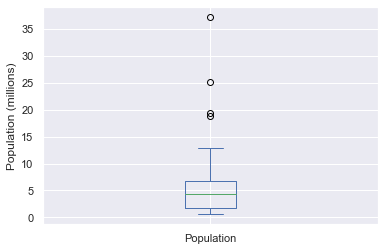

In [12]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

From this boxplot we can immediately see that the median state population is about 5
million, half the states fall between about 2 million and about 7 million, and there are
some high population outliers (shown as circles). The top and bottom of the box are the 75th and 25th
percentiles, respectively. The median is shown by the horizontal line in the box. The
dashed lines, referred to as whiskers, extend from the top and bottom of the box to
indicate the range for the bulk of the data.

**My note -**

To decide on outliers, we calculate $Q3$ (75 quartile) and $Q1$ (25 quartile). These values are represented by upper and lower sides of box in boxplot. 

Now $Q3 + 1.5*(Q3-Q1)$ will represent the *maximum value* and $Q1 - 1.5(Q3-Q1)$ the *minimum value* which will not be considered outliers. Any value beyond this will be considered outlier.  

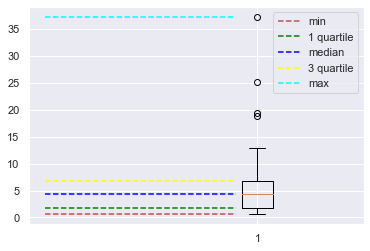

In [13]:
#my illustration 
x = state['Population']/1000000

plt.boxplot(x);

percentile= [(0, 'min','r'),(25, '1 quartile','green'),(50, 'median','blue'),(75,'3 quartile','yellow'),(100, 'max','cyan')]

for p, label, color in percentile:
    plt.hlines(np.percentile(x,p), 0,.9, colors = color, linestyles = '--', label = label)
    
plt.legend()

In [14]:
q3, q1 = np.percentile(x,75), np.percentile(x,25)

xmax = q3 + 1.5*(q3-q1)
xmin = q1 - 1.5*(q3-q1)

xmax, xmin

(13.95127425, -5.43795775)

In [15]:
np.min(x), np.max(x)

(0.563626, 37.253956)

##### Frequency Tables and Histograms 

A frequency table of a variable divides up the variable range into equally spaced segments
and tells us how many values fall within each segment.

In [16]:
binnedPopulation = pd.cut(state['Population']/1000000, 10)
binnedPopulation.value_counts()

(0.527, 4.233]      24
(4.233, 7.902]      14
(7.902, 11.571]      6
(11.571, 15.24]      2
(15.24, 18.909]      1
(18.909, 22.578]     1
(22.578, 26.247]     1
(33.585, 37.254]     1
(26.247, 29.916]     0
(29.916, 33.585]     0
Name: Population, dtype: int64

Text(0, 0.5, 'Count')

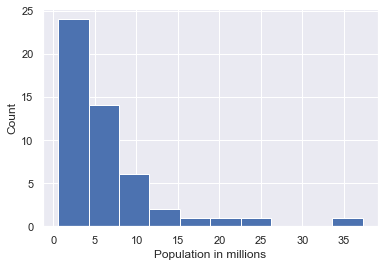

In [18]:
plt.hist(state['Population']/1000000)
plt.xlabel('Population in millions') 
plt.ylabel('Count')

<AxesSubplot:xlabel='Population', ylabel='Count'>

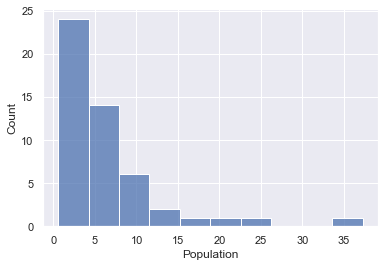

In [19]:
sns.histplot(state['Population']/1000000, bins = 10)

In [20]:
(np.max(x)-np.min(x))/10 #this will be the bin width

3.669033

Note - Both frequency tables and percentiles summarize the data by creating
bins. In general, quartiles and deciles will have the same count
in each bin (equal-count bins), but the bin sizes will be different.
The frequency table, by contrast, will have different counts in the
bins (equal-size bins), and the bin sizes will be the same

##### Aside -  Statistical Moments

In statistical theory, location and variability are referred to as the
first and second *moments* of a distribution. The third and fourth
moments are called *skewness* and *kurtosis*. Skewness refers to
whether the data is skewed to larger or smaller values, and kurtosis
indicates the propensity of the data to have extreme values. Generally,
metrics are not used to measure skewness and kurtosis;
instead, these are discovered through visual displays.

#### Density Plots and Estimates

Related to the histogram is a density plot, which shows the distribution of data values as a continuous line. A density plot can be thought of as a smoothed histogram, although it is typically computed directly from the data through a *kernel density estimate* (see [Duong-2001](https://www.mvstat.net/tduong/research/seminars/seminar-2001-05.pdf) for a short tutorial).

<AxesSubplot:xlabel='Murder.Rate', ylabel='Density'>

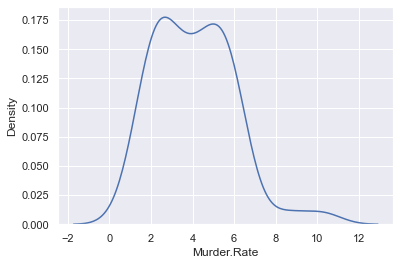

In [44]:
sns.kdeplot(state['Murder.Rate'])

Text(0.5, 0, 'Murder Rate (per 100,000)')

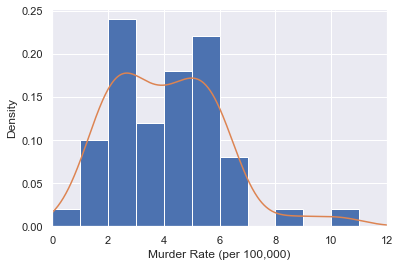

In [38]:
#from textbook
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(0,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

A key distinction from the histogram plotted above is the scale of the y-axis: a
density plot corresponds to plotting the histogram as a proportion rather than counts. Note that the total area under
the density curve = $1$, and instead of counts in bins you calculate areas under the curve between any two points on the x-axis, which correspond to the proportion of the distribution lying between those two points.

#### Exploring Binary and Categorical Data

For categorical data, simple proportions or percentages tell the story of the data.

In [121]:
data = pd.read_csv('data/data/dfw_airline.csv')
data

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [122]:
df = (data/data.sum(axis = 1)[0]*100).round(2)
df

,Carrier,ATC,Weather,Security,Inbound
0,23.02,30.4,4.03,0.12,42.43


In [123]:
data = data.transpose()

In [131]:
data.columns = ['Count']
data.index.name = 'Cause'
data

,Count
Cause,
Carrier,64263.16
ATC,84856.50
Weather,11235.42
Security,343.15
Inbound,118427.82


<AxesSubplot:xlabel='Cause', ylabel='Count'>

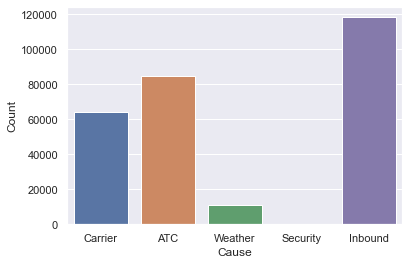

In [135]:
sns.barplot(x = data.index,y = data['Count'])

**Mode** 

The most frequent value

**Expected Value**

A marketer for a new cloud technology, for example, offers two levels of service, one priced at 30USD/month and another at
50USD/month. The marketer offers free webinars to generate leads, and the firm figures that 5% of the attendees will sign up for the 300USD service, 15% will sign up for the 50USD service, and 80% will not sign up for anything. This data can be summed up, for financial purposes, in a single “expected value,” which is a form of weighted mean, in which the weights are probabilities.

The expected value is calculated as follows:

 - 1. Multiply each outcome by its probability of occurrence.
 - 2. Sum these values.


In the cloud service example, the expected value of a webinar attendee is thus $22.50$ USD per month, calculated as follows:

$$EV = 0.05*300 + 0.15*50 + 0.80*0 = 22.5$$

**Probability**

skipped



#### Correlation

Variables $X$ and $Y$ (each with measured data) are said to be positively correlated if high values of $X$ go with high values of $Y$, and low values of $X$ go with low values of $Y$. If high values of $X$ go with low values of $Y$, and vice versa, the variables are negatively correlated.

The *correlation coefficient*, which gives an estimate of the correlation between two variables that always lies on the same scale. To compute *Pearson’s correlation coefficient*, we multiply deviations from the mean for variable 1 times those for variable 2, and divide by the product of the standard deviations:


  $$\color{blue}{\frac{1}{n-1}\sum_{i=1}^n(\frac{x_i-\bar{x}}{s_x})( \frac{y_i-\bar{y}}{s_y})}$$
  

**Note carefully** that if you are using above formula, make sure to use the formula for unbiased standard deviation. By default, Numpy's `np.std` is a biased estimator. In case you use default formula, replace $n-1$  with $n$ in above formula. 

In [160]:
#Pandas method

X = np.array([1,3,5,5,6])
Y = np.array([4,6,10,12,13])
aa = pd.DataFrame({'a': X, 'b': Y})
aa.corr()

,a,b
a,1.000000,0.968246
b,0.968246,1.000000


Above table is called a *correlation matrix*

In [159]:
#using formula

x = X - np.mean(X)
y = Y - np.mean(Y)

xd = np.std(X, ddof = 1)  #unbiased estimator
yd = np.std(Y, ddof = 1)

np.sum(x*y)/(xd*yd)/4

0.9682458365518541

Correlation matrix (see below) shows the correlation between the daily returns for telecommunication stocks from July 2012 through June 2015. From the table, you can see that Verizon (VZ) and ATT (T) have the highest correlation. Level 3 (LVLT),
which is an infrastructure company, has the lowest correlation with the others. Note the diagonal of 1s (the correlation of a stock with itself is 1) and the redundancy of the information above and below the diagonal.

In [175]:
sp500_sym = pd.read_csv('data/data/sp500_sectors.csv')
sp500_px = pd.read_csv('data/data/sp500_data.csv', index_col=0)

telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


<AxesSubplot:>

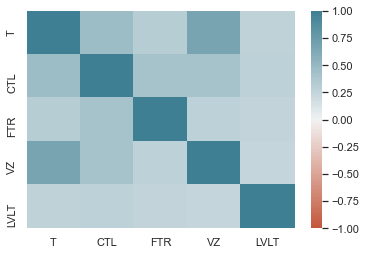

In [180]:
corr = telecom.corr()
sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

<AxesSubplot:>

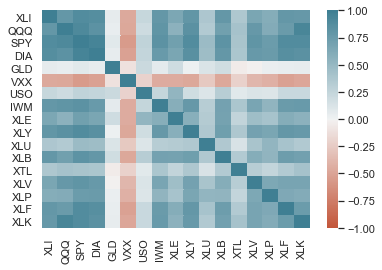

In [181]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

##### Scatterplots

In [196]:
telecom.head()

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000


<AxesSubplot:xlabel='T', ylabel='VZ'>

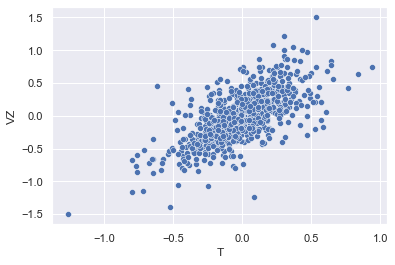

In [193]:
sns.scatterplot(x = telecom['T'], y = telecom['VZ'])

#### Exploring Two or More Variables

Familiar estimators like mean and variance look at variables one at a time (univariate analysis). Correlation analysis (see preceeding section) is an important method that compares two variables (bivariate analysis). In this section we look at additional estimates and plots, and at more than two variables (multivariate analysis).

##### Hexagonal Binning and Contours (Plotting Numeric Versus Numeric Data)

Scatterplots are fine when there is a relatively small number of data values. The plot of stock returns in earlier scatterplot involves only about 750 points. For data sets with hundreds of thousands or millions of records, a scatterplot will be too dense, so we need a different way to visualize the relationship. To illustrate, consider the data set `kc_tax`,
which contains the tax-assessed values for residential properties in King County, Washington. In order to focus on the main part of the data, we strip out very expensive and very small or large residences:

In [2]:
kc_tax = pd.read_csv('data/data/kc_tax.csv.gz')

kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
(kc_tax.SqFtTotLiving > 100) &
(kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

Shown below is a hexagonal binning plot of the relationship between the finished square feet and the tax-assessed value for homes in King County. Rather than plotting points, which would appear as a monolithic dark cloud, we grouped the records into hexagonal bins and plotted the hexagons with a color indicating the number of records in that bin. In this chart, the positive relationship between square feet and tax-assessed value is clear. An interesting feature is the hint of additional bands above the main (darkest) band at the bottom, indicating homes that have the same square footage as those in the main band but a higher tax-assessed value.

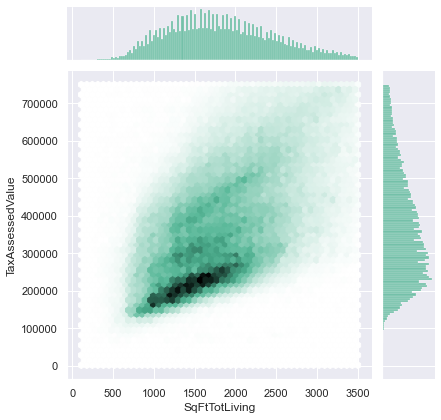

In [3]:
sns.jointplot(x=kc_tax0['SqFtTotLiving'], y=kc_tax0['TaxAssessedValue'], kind="hex", color="#4CB391")

Text(0, 0.5, 'Tax-Assessed Value')

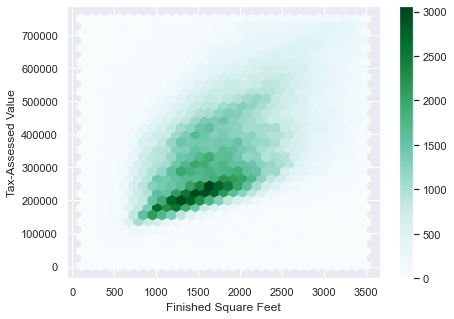

In [4]:
#pandas way of plotting from textbook

ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(7, 5))

ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

<AxesSubplot:xlabel='TaxAssessedValue', ylabel='Count'>

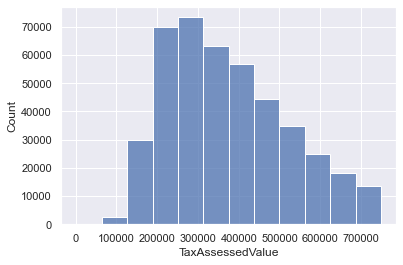

In [5]:
sns.histplot(kc_tax0['TaxAssessedValue'], bins = 12)

Plot shown below uses contours overlaid onto a scatterplot to visualize the relationship
between two numeric variables. The contours are essentially a topographical map to
two variables; each contour band represents a specific density of points, increasing as
one nears a “peak.” This plot shows a similar story as earlier hexbin plot: there is a secondary
peak “north” of the main peak.

<AxesSubplot:xlabel='SqFtTotLiving', ylabel='TaxAssessedValue'>

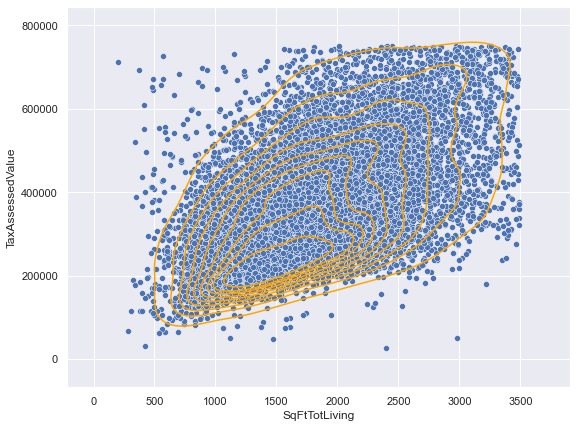

In [16]:
#kc_tax0 dataset takes too long, so we'll take only 10000 samples

data = kc_tax0.sample(10000)

plt.figure(figsize=(9,7))
sns.kdeplot(data=data, x='SqFtTotLiving', y='TaxAssessedValue', color = 'orange')
sns.scatterplot(data=data, x='SqFtTotLiving', y='TaxAssessedValue')

#### Two Categorical Variables

A useful way to summarize two categorical variables is a contingency table—a table of
counts by category. Table 1-8 shows the contingency table between the grade of a personal
loan and the outcome of that loan. This is taken from data provided by Lending
Club, a leader in the peer-to-peer lending business. The grade goes from A (high) to
G (low). The outcome is either fully paid, current, late, or charged off (the balance of
the loan is not expected to be collected). This table shows the count and row percentages.
High-grade loans have a very low late/charge-off percentage as compared with
lower-grade loans.

In [17]:
lc_loans = pd.read_csv('data/data/lc_loans.csv')


crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [20]:
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


#### Categorical and Numeric Data

Boxplots (see relevant section) are a simple way to visually compare the distributions of a numeric variable grouped according to a categorical variable. For example, we might want to compare how the percentage of flight delays
varies across airlines. Plot shown below shows the percentage of flights in a month that were delayed where the delay was within the carrier’s control:

In [24]:
data = pd.read_csv('data/data/airline_stats.csv')
data.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


Text(0, 0.5, 'Daily % of Delayed Flights')

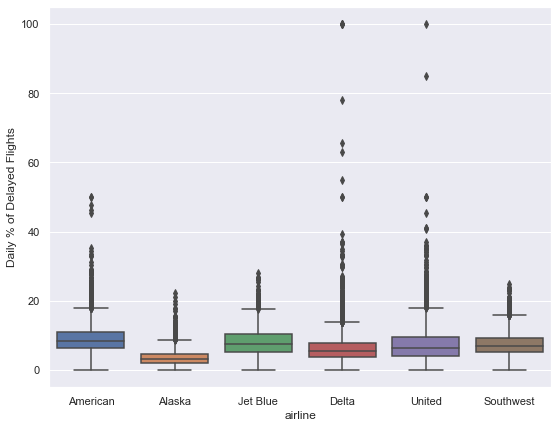

In [27]:
plt.figure(figsize=(9,7))
sns.boxplot(data = data, x = 'airline', y = 'pct_carrier_delay')
plt.ylabel('Daily % of Delayed Flights')

Alaska stands out as having the fewest delays, while American has the most delays:
the lower quartile for American is higher than the upper quartile for Alaska.

##### Violin plot

A violin plot is an enhancement to the boxplot and plots the density estimate with the density on the y-axis. The density is mirrored and flipped over, and the resulting shape is filled in, creating an image resembling a violin. The advantage of a violin plot is that it can show nuances in the distribution that aren’t perceptible in a boxplot. On the other hand, the boxplot more clearly shows the outliers in the data.

Text(0, 0.5, 'Daily % of Delayed Flights')

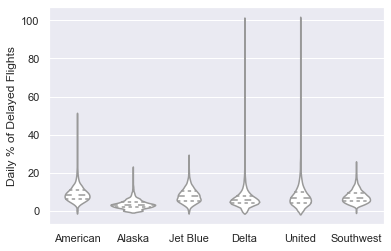

In [42]:
ax = sns.violinplot(x = data.airline, y = data.pct_carrier_delay,
inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

The corresponding plot is shown above. The violin plot shows a concentration in the distribution near zero for Alaska and, to a lesser extent, Delta. This phenomenon is not as obvious in the boxplot.

#### Visualizing Multiple Variables

The types of charts used to compare two variables—scatterplots, hexagonal binning, and boxplots—are readily extended to more variables through the notion of conditioning. As an example, look back at hexbin plot, which showed the relationship between homes’ finished square feet and their tax-assessed values. We observed that there appears to be a cluster of homes that have higher tax-assessed value per square foot. Diving deeper, plot below accounts for the effect of location by plotting the
data for a set of zip codes. Now the picture is much clearer: tax-assessed value is much higher in some zip codes (98105, 98126) than in others (98108, 98188). This disparity gives rise to the clusters observed in hexbin plot.

In [44]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip.sample(12)


,TaxAssessedValue,SqFtTotLiving,ZipCode
151078,259000.0,1160,98108.0
13579,388000.0,1470,98126.0
465008,708000.0,3330,98105.0
447861,347000.0,1430,98105.0
433160,297000.0,1280,98108.0
447965,541000.0,1500,98105.0
406311,172000.0,940,98108.0
217077,490000.0,1550,98105.0
216887,511000.0,1040,98105.0
478939,291000.0,2110,98108.0


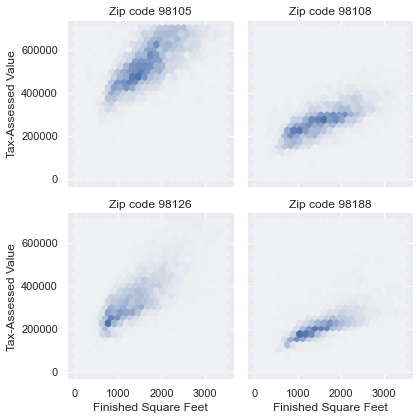

In [45]:

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0, 3500, 0, 700000])

g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

#### $\S$ END OF CHAPTER ONE $\S$

### CHAPTER 2 - DATA AND SAMPLING DISTRIBUTION



#### Sampling Distribution of a Statistic

The term *sampling distribution of a statistic* refers to the distribution of some sample statistic over many samples drawn from the same population.

In [49]:
loans_income = pd.read_csv('data/data/loans_income.csv', squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.sample(10))

          income        type
990    117639.60   Mean of 5
39947  105000.00        Data
596     62400.00   Mean of 5
115     78736.00  Mean of 20
232     76778.00   Mean of 5
13926   95000.00        Data
1       81865.45  Mean of 20
582     76542.45  Mean of 20
973     65820.00  Mean of 20
121     58447.15  Mean of 20


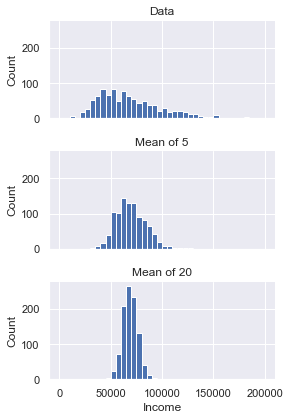

In [50]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

#### Central Limit Theorem

The phenomenon we’ve just described is termed the central limit theorem. It says that the means drawn from multiple samples will resemble the familiar bell-shaped normal curve, even if the source population is not normally distributed, provided that the sample size is large enough and the departure of the data from normality is not too great.

#### Standard Error

The standard error is a single metric that sums up the variability in the sampling distribution for a statistic. The standard error can be estimated using a statistic based on the standard deviation $s$ of the sample values, and the sample size $n$:

$$SE = \frac{s}{\sqrt{n}}$$

As the sample size increases, the standard error decreases, corresponding to what was observed above. The relationship between standard error and sample size is sometimes referred to as the square root of $n$ rule: to reduce the standard error by a factor of $2$, the sample size must be increased by a factor of $4$.

**My Comment** 

Note that CLT is an *asymptotic* result. The larger the sample size, the better the result (as is evident by above plot). The resulting sampling distribution is centered around population mean and the standard deviation of this sampling distribution is given by $\frac{\sigma}{\sqrt{n}}$. When sample is large and population standard deviation ($\sigma$) is unknown, sample standard deviation $s$ is used in place of $\sigma$.

#### The Bootstrap

To better estimate standard error, it'd be good idea to collect as many samples as possible. However, usually you can't take multiple samples from population. Most of the times, all you have a sample of size $n$ and you have to estimate standard error from this sample only.

One easy and effective way to estimate the sampling distribution of a statistic, or of model parameters, is to draw additional samples, with replacement, from the sample itself and recalculate the statistic or model for each resample. This procedure is called the bootstrap, and it does not necessarily involve any assumptions about the data or the sample statistic being normally distributed.

The algorithm for a bootstrap resampling of the mean, for a sample of size n, is as follows:

 1. Draw a sample value, record it, and then replace it.
 2. Repeat n times.
 3. Record the mean of the n resampled values.
 4. Repeat steps 1–3 R times.
 5. Use the R results to:
  
  - a. Calculate their standard deviation (this estimates sample mean standard error).
  - b. Produce a histogram or boxplot.
  - c. Find a confidence interval.

The major Python packages don’t provide implementations of the bootstrap
approach. It can be implemented using the scikit-learn method `resample`:

In [54]:
sample = resample(loans_income)
sample.median()

61500.0

In [58]:
results = []

for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -78.89400000000023
std. error: 222.7002383477861


In [59]:
loans_income.mean()

68760.51844

The bootstrap can be used with multivariate data, where the rows are sampled as units. A model might then be run on the bootstrapped data, for example, to estimate the stability (variability) of model parameters, or to improve
predictive power. With classification and regression trees (also called decision trees), running multiple trees on bootstrap samples and then averaging their predictions (or, with classification, taking a majority vote) generally performs better than using a single tree. This process is called bagging (short for “bootstrap aggregating”).

#### Confidence Intervals

Frequency tables, histograms, boxplots, and standard errors are all ways to understand the potential error in a sample estimate. Confidence intervals are another.

Confidence intervals always come with a coverage level, expressed as a (high) percentage, say $90\%$ or $95\%$. One way to think of a $90\%$ confidence interval is as follows: it is the interval that encloses the central $90\%$ of the bootstrap sampling distribution of a sample statistic (see “The Bootstrap” section). More generally, an $x\%$ confidence interval around a sample estimate should, on average, contain similar sample estimates $x\%$ of the time (when a similar sampling procedure is followed).

Given a sample of size $n$, and a sample statistic of interest, the algorithm for a bootstrap confidence interval is as follows:

1. Draw a random sample of size $n$ with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1–2 many ($R$) times.
4. For an $x\%$ confidence interval, trim $[(100-x) / 2]\%$ of the $R$ resample results from
either end of the distribution.
5. The trim points are the endpoints of an $x\%$ bootstrap confidence interval.

68760.51844
55734.1


Text(0, 0.5, 'Counts')

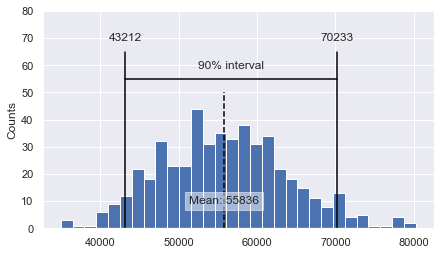

In [61]:
print(loans_income.mean())

np.random.seed(seed=3)  
# create a sample of 20 loan income data

sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))

ax = results.plot.hist(bins=30, figsize=(7, 4))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')


In [62]:
confidence_interval

[43212.45, 70233.43999999999]

The percentage associated with the confidence interval is termed the level of confidence.
The higher the level of confidence, the wider the interval. Also, the smaller the
sample, the wider the interval (i.e., the greater the uncertainty). Both make sense: the
more confident you want to be, and the less data you have, the wider you must make
the confidence interval to be sufficiently assured of capturing the true value.

#### Normal Distribution

General discussion. 

#### Standard Normal and Q-Q Plots

A standard normal distribution is one in which the units on the x-axis are expressed in terms of standard deviations away from the mean. This has a mean of $0$ and standard deviation of $1$. 

A QQ-Plot is used to visually determine how close a sample is to a specified distribution— in this case, the normal distribution. The QQ-Plot orders the z-scores from low to high and plots each value’s z-score on the y-axis; the x-axis is the corresponding quantile of a normal distribution for that value’s rank. Since the data is normalized, the units correspond to the number of standard deviations away from the mean. If the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal. Plot below shows a QQ-Plot for a sample of 100 values randomly
generated from a normal distribution; as expected, the points closely follow the line.

The package _scipy_ has the function (`scipy.stats.probplot`) to create QQ-plots. The argument `dist` specifies the distribution, which is set by default to the normal distribution.

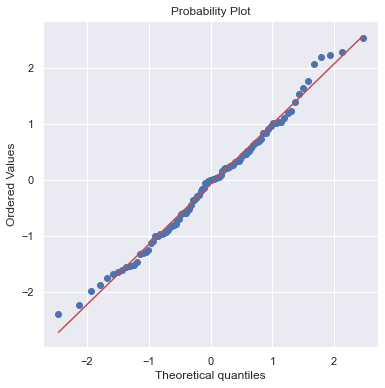

In [5]:
fig,ax = plt.subplots(figsize=(6, 6))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax); #or use below line

#stats.probplot(norm_sample, plot=sns.mpl.pyplot);

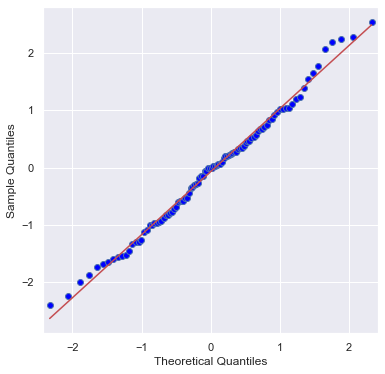

In [7]:
import statsmodels.api as sm

fig,ax = plt.subplots(figsize=(6, 6))

plot = sm.qqplot(norm_sample, line = 'r', ax = ax) #assign it to a variable, see below

#if you don't assign it to a variable, duplicate plot also shows up
#https://github.com/statsmodels/statsmodels/issues/1265

#### My Notes

Following is the way to visualize how the concept of normal distribution quantiles work. We already have a sample `norm_sample` drawn from standard normal distribution. First we sort the data. We can calculate `norm.cdf` of each sample point. Note that for a given point $a$, the `norm.cdf` gives the area from $-\infty$ to $a$, that is area of the curve to the left side of $a$. This means the value `1-cdf` will give the area of remaining curve (left side of $a$). 

![](images/normal-15.png)
Our (sorted) sample size is $100$. This means count of the points which come after $a$ in sorted sample size should roughly be equal to the value `1-cdf` (times 100). Put another way, if sample size is $n$ and number of points appearing after $a$ in sample is $m$ then $\frac{m}{n}$ should be approximately equal to `1-cdf`.  

Text(0, 0.5, 'Actual count')

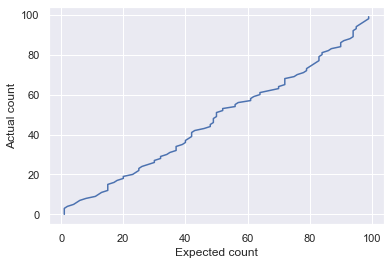

In [42]:
xyz = norm_sample
xyz.sort() #in place sorting

count, cdf = [], []

for i in range(100):
    a = (1- norm.cdf(xyz[i]))*100 #percentage of area of curve after point at index i.
    cdf.append(round(a))          #rounded off area
    count.append(99-i)            #count of points appearing after point at index i
    

plt.plot(cdf,count)
plt.xlabel('Expected count')
plt.ylabel('Actual count')

The above plot is roughly following the $y=x$ line which means that our sample data is from normal distribution. The same idea is behind the QQ plot in earlier example.


Using the formula mentioned in [Scipy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html#scipy.stats.probplot) -

    quantiles = dist.ppf(val), for
    0.5**(1/n),                  for i = n
    val = (i - 0.3175) / (n + 0.365),  for i = 2, ..., n-1
    1 - 0.5**(1/n),              for i = 1

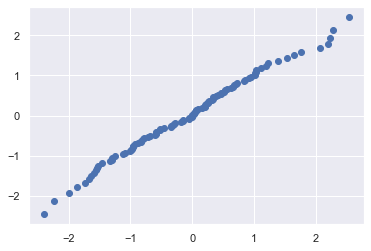

In [58]:
n = 100   #because sample size in 100
arr = np.ones(n) 

arr[0] = 1-(0.5**.01)
arr[99] = 0.5**(1/n)

val = [(i - 0.3175) / (n + 0.365) for i in range(2,100)]

arr[1:99] = val

quantiles = norm.ppf(arr)

plt.scatter(xyz, quantiles)

You can see that `quantiles` is equal to theoretical quantiles produced by `stats.probplot`

In [62]:
a = stats.probplot(norm_sample) #returns a tuple of length 2. First element of returned tuple is another tuple of len 2
quantiles == a[0][0]  

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

#### Long-Tailed Distributions

While the normal distribution is often appropriate and useful with respect to the distribution of errors and sample statistics, it typically does not characterize the distribution of raw data. Sometimes, the distribution is highly skewed (asymmetric), such as with income data; or the distribution can be discrete, as with binomial data. Both symmetric and asymmetric distributions may have long tails. The tails of a distribution correspond to the extreme values (small and large). Long tails, and guarding against them, are widely recognized in practical work. Nassim Taleb has proposed the
black swan theory, which predicts that anomalous events, such as a stock market crash, are much more likely to occur than would be predicted by the normal distribution.

((array([-3.33278964, -3.07756454, -2.93575124, ...,  2.93575124,
          3.07756454,  3.33278964]),
  array([-6.60529819, -6.09667121, -5.40220961, ...,  5.12547859,
          5.87072271,  6.03787   ])),
 (1.4823778663727099, 0.0015561067366313861, 0.9941828221936322))

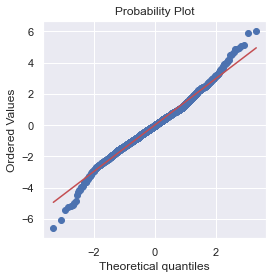

In [67]:
sp500_px = pd.read_csv('data/data/sp500_data.csv')

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

((array([-3.33278964, -3.07756454, -2.93575124, ...,  2.93575124,
          3.07756454,  3.33278964]),
  array([-3.67857374, -2.63285831, -2.42142483, ...,  3.29285803,
          3.55000702,  3.72142027])),
 (0.42380494954745296, 0.0002800447456731033, 0.8782806484044747))

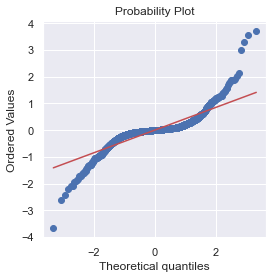

In [69]:
#same as above, except that data isn't converted to log scale
nflx = sp500_px.NFLX
nflx = np.diff(nflx[nflx>0])

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

In contrast to earlier QQ plot (normal dist), the points are far below the line for low values and far above the line for high values, indicating the data are not normally distributed. This means that we are much more likely to observe extreme values than would be expected if the data had a normal distribution. Above plot shows another common phenomenon: the points are close to the line for the data within one standard deviation of the mean. Tukey refers to this phenomenon as data being “normal in the middle” but having much longer tails

#### Student’s t-Distribution

The **t-distribution** is a normally shaped distribution, except that it is a bit thicker and longer on the tails. It is used extensively in depicting distributions of sample statistics. Distributions of sample means are typically shaped like a t-distribution, and there is a family of t-distributions that differ depending on how large the sample is. The larger
the sample, the more normally shaped the t-distribution becomes.

*No example code for t-distribution in textbook*

#### Binomial Distribution

Yes/no (binomial) outcomes lie at the heart of analytics since they are often the culmination of a decision or other process; buy/don’t buy, click/don’t click, survive/die, and so on. Central to understanding the binomial distribution is the idea of a set of trials, each trial having two possible outcomes with definite probabilities.

The binomial distribution is the frequency distribution of the number of successes ($x$) in a given number of trials ($n$) with specified probability ($p$) of success in each trial. There is a family of binomial distributions, depending on the values of $n$ and $p$. The binomial distribution would answer a question like:

    If probability of a click converting to a sale is .02, what is the probability of observing 0 sales in 200 clicks?

In [70]:
print(stats.binom.pmf(2, n=5, p=0.1)) #exactly 2 successes

0.0729


In [72]:
print(stats.binom.cdf(2, n=5, p=0.1)) #2 or less successes

0.99144


The mean of a binomial distribution is $n × p$; you can also think of this as the expected number of successes in $n$ trials, for success probability = $p$.

The variance is $n × p (1 − p)$ . With a large enough number of trials (particularly when $p$ is close to $0.50$), the binomial distribution is virtually indistinguishable from the normal distribution. In fact, calculating binomial probabilities with large sample sizes is computationally demanding, and most statistical procedures use the normal distribution, with mean and variance, as an approximation.

#### Chi-Square Distribution

An important idea in statistics is departure from expectation, especially with respect to
category counts. Expectation is defined loosely as “nothing unusual or of note in the
data”

For example, you might want to test whether one variable (say, a row variable representing
gender) is independent of another (say, a column variable representing “was
promoted in job”), and you have counts of the number in each of the cells of the data
table. The statistic that measures the extent to which results depart from the null
expectation of independence is the chi-square statistic. It is the difference between the
observed and expected values, divided by the square root of the expected value,
squared, then summed across all categories. This process standardizes the statistic so
it can be compared to a reference distribution. A more general way of putting this is
to note that the chi-square statistic is a measure of the extent to which a set of
observed values “fits” a specified distribution (a “goodness-of-fit” test). It is useful for
determining whether multiple treatments (an “A/B/C… test”) differ from one another
in their effects.

#### F - Distribution

A common procedure in scientific experimentation is to test multiple treatments across groups—say, different fertilizers on different blocks of a field. This is similar to the A/B/C test referred to in the chi-square distribution (see “Chi-Square Distribution” in preceeding section), except we are dealing with measured continuous values rather than counts. In this case we are interested in the extent to which differences among group means are greater than we might expect under normal random variation. The F-statistic measures this and is the ratio of the variability among the group means to the variability within each group (also called residual variability). This comparison is termed an analysis of variance (see “ANOVA” in later sections). The distribution of the F-statistic is the frequency distribution of all the values that would be produced by randomly permuting data in which all the group means are equal (i.e., a null model).

There are a variety of F-distributions associated with different degrees of freedom (e.g., numbers of groups—see “Degrees of Freedom” later). The calculation of F is illustrated in the section on ANOVA. The F-statistic is also used in linear regression to compare the variation accounted for by the regression model to the overall
variation in the data. F-statistics are produced automatically by R and Python as part
of regression and ANOVA routines.

#### Poisson and Related Distributions

Many processes produce events randomly at a given overall rate—visitors arriving at a website, or cars arriving at a toll plaza (events spread over time); imperfections in a square meter of fabric, or typos per 100 lines of code (events spread over space).

#### Poisson Distributions

From prior aggregate data (for example, number of flu infections per year), we can estimate the average number of events per unit of time or space (e.g., infections per day, or per census unit). We might also want to know how different this might be
from one unit of time/space to another. The Poisson distribution tells us the distribution of events per unit of time or space when we sample many such units. It is useful when addressing queuing questions such as “How much capacity do we need to be $95\%$ sure of fully processing the internet traffic that arrives on a server in any fivesecond
period?”

The key parameter in a Poisson distribution is $λ$, or $lambda$. This is the mean number of events that occurs in a specified interval of time or space. The variance for a Poisson distribution is also $λ$.

A common technique is to generate random numbers from a Poisson distribution as part of a queuing simulation. The function we need for this is a scipy function `stats.poisson.rvs`:

    stats.poisson.rvs(2, size=100)

This code will generate $100$ random numbers from a Poisson distribution with $λ = 2$.

For example, if incoming customer service calls average two per minute, this code will simulate 100 minutes, returning the number of calls in each of those 100 minutes.

<AxesSubplot:ylabel='Count'>

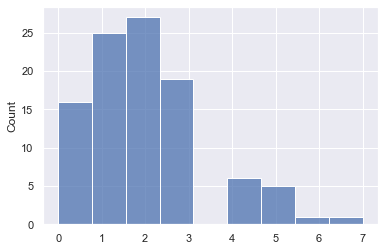

In [75]:
sample = stats.poisson.rvs(2, size=100)

sns.histplot(sample)

#### Exponential Distribution

Using the same parameter $λ$ that we used in the Poisson distribution, we can also model the distribution of the time between events: time between visits to a website or between cars arriving at a toll plaza. It is also used in engineering to model time to failure, and in process management to model, for example, the time required per service call. The Scipy code `stats.expon.rvs` to generate random numbers from an exponential distribution takes two arguments: $size$ (the quantity of numbers to be generated) and rate (the number of events per time period). For example:

    stats.expon.rvs(0.2, size=100)

This code would generate 100 random numbers from an exponential distribution where the mean number of events per time period is 0.2. So you could use it to simulate 100 intervals, in minutes, between service calls, where the average rate of incoming
calls is 0.2 per minute.

A key assumption in any simulation study for either the Poisson or exponential distribution is that the rate, $λ$, remains constant over the period being considered. This is rarely reasonable in a global sense; for example, traffic on roads or data networks varies by time of day and day of week. However, the time periods, or areas of space, can usually be divided into segments that are sufficiently homogeneous so that analysis or simulation within those periods is valid.

<AxesSubplot:ylabel='Count'>

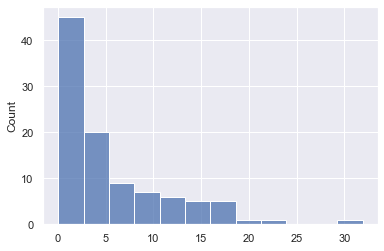

In [76]:
sample = stats.expon.rvs(scale=5, size=100)

sns.histplot(sample)

#### Weibull Distribution

In many cases, the event rate does not remain constant over time. If the period over which it changes is much longer than the typical interval between events, there is no problem; you just subdivide the analysis into the segments where rates are relatively constant, as mentioned before. If, however, the event rate changes over the time of the interval, the exponential (or Poisson) distributions are no longer useful. This is likely to be the case in mechanical failure—the risk of failure increases as time goes by. The Weibull distribution is an extension of the exponential distribution in which the event rate is allowed to change, as specified by a shape parameter, $β$. If $β > 1$, the probability of an event increases over time; if $β < 1$, the probability decreases. Because the Weibull distribution is used with time-to-failure analysis instead of event rate, the second parameter is expressed in terms of characteristic life, rather than in terms of the rate of events per interval. The symbol used is $η$, the Greek letter **eta**. It is also called the **scale parameter**.

With the Weibull, the estimation task now includes estimation of both parameters, $β$
and $η$. Software is used to model the data and yield an estimate of the best-fitting Weibull distribution.

The Scipy code `stats.weibull_min.rvs(1.5, scale=5000, size=100)` takes three parameters shape `c`, `size` and `scale`

<AxesSubplot:ylabel='Count'>

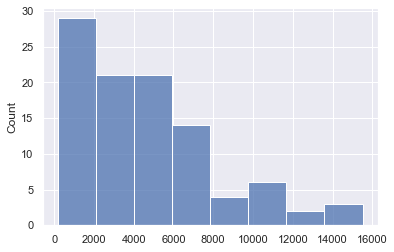

In [80]:
sample = stats.weibull_min.rvs(c = 1.5, scale=5000, size=100)

sns.histplot(sample)

#### $\S$ END OF CHAPTER TWO$\S$

### CHAPTER 3 - STATISTICAL EXPERIMENTS AND SIGNIFICANCE TESTING




#### A/B Testing

An A/B test is an experiment with two groups to establish which of two treatments, products, procedures, or the like is superior. Often one of the two treatments is the standard existing treatment, or no treatment. If a standard (or no) treatment is used, it is called the control. A typical hypothesis is that a new treatment is better than the
control.

##### Key Terms for A/B Testing

$Treatment$ - Something (drug, price, web headline) to which a subject is exposed.

$Treatment group$ - A group of subjects exposed to a specific treatment.

$Control group$ - A group of subjects exposed to no (or standard) treatment.

$Randomization$ - The process of randomly assigning subjects to treatments.

$Subjects$ - The items (web visitors, patients, etc.) that are exposed to treatments.

$Test statistic$ - The metric used to measure the effect of the treatment.

Some examples of A/B testing include:

 - Testing two soil treatments to determine which produces better seed germination

 - Testing two therapies to determine which suppresses cancer more effectively

 - Testing two prices to determine which yields more net profit

 - Testing two web headlines to determine which produces more clicks

 - Testing two web ads to determine which generates more conversions
 
A proper A/B test has *subjects* that can be assigned to one treatment or another. The
subject might be a person, a plant seed, a web visitor; the key is that the subject is
exposed to the treatment. Ideally, subjects are *randomized* (assigned randomly) to
treatments. 

You also need to pay attention to the test statistic or metric you use to compare group
A to group B. Perhaps the most common metric in data science is a binary variable:
click or no-click, buy or don’t buy, fraud or no fraud, and so on. Those results would
be summed up in a 2×2 table. Example of such an table - 

Outcome|Price A|Price B
----------|-----|-----
Conversion|200|182
No conversion|23539|22406

If the metric is a continuous variable (purchase amount, profit, etc.) or a count (e.g., days in hospital, pages visited), the result might be displayed differently. If one were interested not in conversion but in revenue per page view, the results of the price test  might look like this in typical default software output:

    Revenue/page view with price A: mean = 3.87, SD = 51.10
    Revenue/page view with price B: mean = 4.11, SD = 62.98



#### Hypothesis Tests

Hypothesis tests, also called significance tests, are ubiquitous in the traditional statistical analysis of published research. Their purpose is to help you learn whether random chance might be responsible for an observed effect.

##### Key Terms for Hypothesis Tests

$Null\ hypothesis$ - The hypothesis that chance is to blame.

$Alternative\ hypothesis$ - Counterpoint to the null (what you hope to prove).

$One-way\ test$ - Hypothesis test that counts chance results only in one direction.

$Two-way\ test$ - Hypothesis test that counts chance results in two directions.

#### The Null Hypothesis

Hypothesis tests use the following logic: “Given the human tendency to react to
unusual but random behavior and interpret it as something meaningful and real, in
our experiments we will require proof that the difference between groups is more
extreme than what chance might reasonably produce.” This involves a baseline
assumption that the treatments are equivalent, and any difference between the groups
is due to chance. This baseline assumption is termed the *null hypothesis*. Our hope,
then, is that we can in fact prove the null hypothesis *wrong* and show that the outcomes
for groups A and B are more different than what chance might produce.

#### Alternative Hypothesis

Hypothesis tests by their nature involve not just a null hypothesis but also an offsetting alternative hypothesis. Here are some examples:

 - Null = “no difference between the means of group A and group B”; alternative = “A is different from B” (could be bigger or smaller)
 
 - Null = “A ≤ B”; alternative = “A > B”
 - Null = “B is not X% greater than A”; alternative = “B is X% greater than A”

Taken together, the null and alternative hypotheses must account for all possibilities. The nature of the null hypothesis determines the structure of the hypothesis test.

#### One-Way Versus Two-Way Hypothesis Tests

Often in an A/B test, you are testing a new option (say, B) against an established
default option (A), and the presumption is that you will stick with the default option
unless the new option proves itself definitively better. In such a case, you want a
hypothesis test to protect you from being fooled by chance in the direction favoring
B. You don’t care about being fooled by chance in the other direction, because you
would be sticking with A unless B proves definitively better. So you want a *directional*
alternative hypothesis (B is better than A). In such a case, you use a *one-way* (or onetail)
hypothesis test. This means that extreme chance results in only one direction
count toward the p-value.

If you want a hypothesis test to protect you from being fooled by chance in either
direction, the alternative hypothesis is *bidirectional* (A is different from B; could be
bigger or smaller). In such a case, you use a *two-way* (or two-tail) hypothesis. This
means that extreme chance results in either direction count toward the p-value.
A one-tail hypothesis test often fits the nature of A/B decision making, in which a
decision is required and one option is typically assigned “default” status unless the
other proves better. Software, however, including R and `scipy` in Python, typically
provides a two-tail test in its default output, and many statisticians opt for the more
conservative two-tail test just to avoid argument. One-tail versus two-tail is a confusing
subject, and not that relevant for data science, where the precision of p-value calculations
is not terribly important.

#### Resampling

Resampling in statistics means to repeatedly sample values from observed data, with a general goal of assessing random variability in a statistic. It can also be used to assess and improve the accuracy of some machine-learning models (e.g., the predictions from decision tree models built on multiple bootstrapped data sets can be averaged in
a process known as bagging.

There are two main types of resampling procedures: the **bootstrap** and **permutation tests**. The bootstrap is used to assess the reliability of an estimate; it was discussed in the previous chapter. Permutation tests are used to test hypotheses, typically involving two or more groups, and we discuss those in this section.

#### Permutation Test

In a permutation procedure, two or more samples are involved, typically the groups in an A/B or other hypothesis test. *Permute means* to change the order of a set of values. The first step in a permutation test of a hypothesis is to combine the results from groups A and B (and, if used, C, D,…). This is the logical embodiment of the null hypothesis that the treatments to which the groups were exposed do not differ. We then test that hypothesis by randomly drawing groups from this combined set and seeing how much they differ from one another. The permutation procedure is as follows:

 1. Combine the results from the different groups into a single data set.

 2. Shuffle the combined data and then randomly draw (without replacement) a resample of the same size as group A (clearly it will contain some data from the other groups).

 3. From the remaining data, randomly draw (without replacement) a resample of the same size as group B.

 4. Do the same for groups C, D, and so on. You have now collected one set of resamples that mirror the sizes of the original samples.

 5. Whatever statistic or estimate was calculated for the original samples (e.g., difference in group proportions), calculate it now for the resamples, and record; this constitutes one permutation iteration.
 
 6. Repeat the previous steps R times to yield a permutation distribution of the test statistic.
 
Now go back to the observed difference between groups and compare it to the set of permuted differences. If the observed difference lies well within the set of permuted differences, then we have not proven anything—the observed difference is within the range of what chance might produce. However, if the observed difference lies outside most of the permutation distribution, then we conclude that chance is *not* responsible. In technical terms, the difference is **statistically significant**. 

#### Example: Web Stickiness

A company selling a relatively high-value service wants to test which of two web presentations does a better selling job. Due to the high value of the service being sold, sales are infrequent and the sales cycle is lengthy; it would take too long to accumulate enough sales to know which presentation is superior. So the company decides to measure the results with a proxy variable, using the detailed interior page that describes the service.

The result is a total of $36$ sessions for the two different presentations, $21$ for page A and $15$ for page B. We can visually compare the session times using side-by-side boxplots:


In [89]:
session_times = pd.read_csv('data/data/web_page_data.csv')

session_times.sample(5)

,Page,Time
31,Page A,0.74
15,Page B,1.87
17,Page B,1.26
25,Page B,2.23
28,Page A,0.65


<AxesSubplot:xlabel='Page', ylabel='Time'>

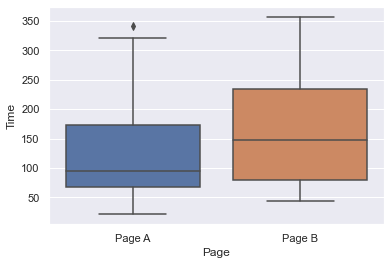

In [90]:
session_times.Time = 100 * session_times.Time

sns.boxplot(data = session_times, x = 'Page', y = 'Time')

Text(0.5, 0.98, '')

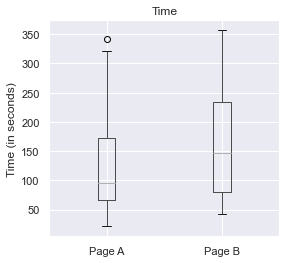

In [91]:
#Pandas way of plotting

ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

We filter the pandas data frame first by page and then determine the mean of the `Time` column:

In [111]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_a, mean_b) 
print(mean_b - mean_a)

126.33333333333333 162.0
35.66666666666667


Page B has session times that are greater than those of page A by $35.67$ seconds, on average. The question is whether this difference is within the range of what random chance might produce, i.e., is statistically significant. One way to answer this is to apply a permutation test—combine all the session times together and then repeatedly shuffle and divide them into groups of 21 (recall that $n_A = 21$ for page A) and 15 ($n_B = 15$ for page B).

To apply a permutation test, we need a function to randomly assign the $36$ session times to a group of $21$ (page A) and a group of $15$ (page B).



In [107]:
# Permutation test example with stickiness
import random
random.seed(1)

def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B               #set is used as difference operation is supported 
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()
    
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

6.523809523809518


Text(0, 0.5, 'Frequency')

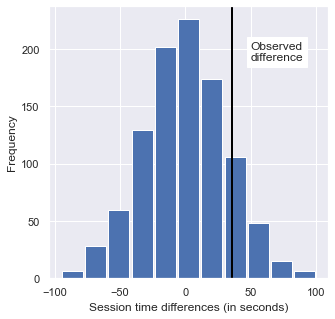

In [108]:

perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

In [109]:
np.mean(np.array(perm_diffs) > (mean_b - mean_a))

0.121

This suggests that the observed difference in session time between page A and page B
is well within the range of chance variation and thus is not statistically significant.

#### Exhaustive and Bootstrap Permutation Tests

In addition to the preceding random shuffling procedure, also called a *random permutation test* or a *randomization test*, there are two variants of the permutation test:

 - An exhaustive permutation test
 - A bootstrap permutation test
 
Refer the textbook for discussion about them.

#### Permutation Tests: The Bottom Line for Data Science

Permutation tests are useful heuristic procedures for exploring the role of random variation. They are relatively easy to code, interpret, and explain, and they offer a useful detour around the formalism and “false determinism” of formula-based statistics, in which the precision of formula “answers” tends to imply unwarranted certainty.

One virtue of resampling, in contrast to formula approaches, is that it comes much closer to a one-size-fits-all approach to inference. Data can be numeric or binary. Sample sizes can be the same or different. Assumptions about normally distributed
data are not needed.

##### Statistical Significance and p-Values

Statistical significance is how statisticians measure whether an experiment (or even a study of existing data) yields a result more extreme than what chance might produce. If the result is beyond the realm of chance variation, it is said to be statistically significant.

##### Key Terms for Statistical Significance and p-Values

$p-value$

Given a chance model that embodies the null hypothesis, the p-value is the probability of obtaining results as unusual or extreme as the observed results.

$Alpha$

The probability threshold of “unusualness” that chance results must surpass for actual outcomes to be deemed statistically significant.

$Type\ 1\ error$

Mistakenly concluding an effect is real (when it is due to chance).

$Type\ 2\ error$

Mistakenly concluding an effect is due to chance (when it is real).


Outcome|Price A|Price B|Total
----------|-----|-----|----
Conversion|200|182|382
No conversion|23539|22406|45945
Total|23739|22588|

Price $A$ converts almost $5\%$ better than price $B$ ($0.8425\% = 200/(23539+200)*100$, versus $0.8057\% = 182/(22406+182)*100$—a difference of $0.0368$ percentage points), big enough to be meaningful in a high-volume business. We have over 45,000 data points here, and it is tempting to consider this as “big data,” not requiring tests of statistical significance (needed mainly to account for sampling variability in small samples). However, the conversion rates are so low (less than $1\%$) that the actual meaningful values—the conversions—are only in the 100s, and the sample size needed is really determined by these conversions. We can test whether the difference in conversions between prices A and B is within the range of chance variation, using a resampling procedure. By chance variation, we mean the random variation produced
by a probability model that embodies the null hypothesis that there is no difference between the rates (see “The Null Hypothesis” in earlier section). The following permutation procedure asks, “If the two prices share the same conversion rate, could chance variation produce a difference as big as $5\%$?”

  1. Put cards labeled 1 and 0 in a box: this represents the supposed shared conversion rate of $382$ ones and $45,945$ zeros = $0.008246 = 0.8246\%$.

  2. Shuffle and draw out a resample of size $23,739$ (same $n$ as price A), and record how many 1s.

  3. Record the number of 1s in the remaining $22,588$ (same $n$ as price B).

  4. Record the difference in proportion of $1$s.
 
  5. Repeat steps 2–4.

  6. How often was the difference $>= 0.0368$?

Reusing the function `perm_fun` defined in “Example: Web Stickiness”, we can create a histogram of randomly permuted differences in conversion rate -

Observed difference: 0.0368%


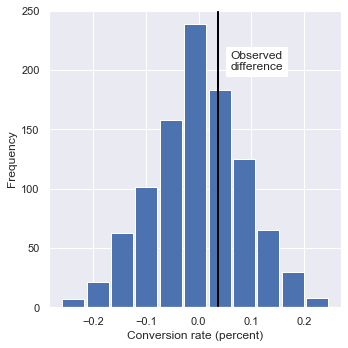

In [112]:
random.seed(1)

obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588) 
              for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

See the histogram of 1,000 resampled results in above plot: as it happens, in this case
the observed difference of 0.0368% is well within the range of chance variation.

#### p-Value 

Note - Need to revisit this and preceeding sections to get better clarity.

Simply looking at the graph is not a very precise way to measure statistical significance, so of more interest is the **p-value***. This is the frequency with which the chance model produces a result more extreme than the observed result. We can estimate a pvalue from our permutation test by taking the proportion of times that the permutation test produces a difference equal to or greater than the observed difference:

In [113]:

np.mean([diff > obs_pct_diff for diff in perm_diffs])

0.332

The p-value is $0.332$, which means that we would expect to achieve a result as extreme as this, or a more extreme result, by random chance over $33\%$ of the time.

In this case, we didn’t need to use a permutation test to get a p-value. Since we have a binomial distribution, we can approximate the p-value.

The method `scipy.stats.chi2_contingency` takes the values as shown in the table shown earlier - 

In [114]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')


p-value for single sided test: 0.3498


The normal approximation yields a p-value of $0.3498$, which is close to the p-value obtained from the permutation test.

Statisticians frown on the practice of leaving it to the researcher’s discretion to determine whether a result is “too unusual” to happen by chance. Rather, a threshold is specified in advance, as in “more extreme than $5\%$ of the chance (null hypothesis) results”; this threshold is known as alpha. Typical alpha levels are $5\%$ and $1\%$.

#### Type 1 and Type 2 Errors

In assessing statistical significance, two types of error are possible:

 - A Type 1 error, in which you mistakenly conclude an effect is real, when it is really just due to chance

 - A Type 2 error, in which you mistakenly conclude that an effect is not real (i.e., due to chance), when it actually is real
 
Actually, a Type 2 error is not so much an error as a judgment that the sample size is too small to detect the effect. When a p-value falls short of statistical significance (e.g., it exceeds 5%), what we are really saying is “effect not proven.” It could be that a larger sample would yield a smaller p-value.

The basic function of significance tests (also called hypothesis tests) is to protect against being fooled by random chance; thus they are typically structured to minimize Type 1 errors.

#### t-Tests

Need to calculate this value from other methods. Also have to understand the function

In [115]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time, 
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


In [116]:
tstat, pvalue, df = sm.stats.ttest_ind(
    session_times[session_times.Page == 'Page A'].Time, 
    session_times[session_times.Page == 'Page B'].Time,
    usevar='unequal', alternative='smaller')
print(f'p-value: {pvalue:.4f}')

p-value: 0.1408


In [133]:
tstat, pvalue, df

(-1.098315562363811, 0.1407621862285032, 27.693370059531322)

In [140]:
from scipy.stats import t
t.cdf(tstat,df)         #area from -infty to tstat in t-distribution

#same value produced as pvalue above

0.1407621862285032

In [143]:
#https://statisticaloddsandends.wordpress.com/2020/07/03/welchs-t-test-and-the-welch-satterthwaite-equation/
#above link gives the formulae for tstat and degree of freedom used in sm.stats.ttest_ind()

A = session_times[session_times.Page == 'Page A'].Time
B = session_times[session_times.Page == 'Page B'].Time

Amean, Astd = A.mean(), A.std()
Bmean, Bstd = B.mean(), B.std()
n1,n2 = 21,15

Ase = (Astd**2)/n1 #sample one squared SE
Bse = (Bstd**2)/n2 #sample two squared SE

(Amean-Bmean)/np.sqrt(Ase+Bse) #This gives tstat which is same as calculated above

-1.098315562363811

In [151]:
#formula for degree of freedom from above link

xx = ((Ase+Bse)**2)
yy = (Astd**4)/((n1**2)*20)
zz = (Bstd**4)/((n2**2)*14)

xx/(yy+zz) #produces the same as calculated earlier

27.69337005953131

#### Degrees of Freedom

In the documentation and settings for many statistical tests and probability distributions, you will see a reference to “degrees of freedom.” The concept is applied to statistics calculated from sample data, and refers to the number of values free to vary. For example, if you know the mean for a sample of 10 values, there are 9 degrees of freedom (once you know 9 of the sample values, the 10th can be calculated and is not free to vary). The degrees of freedom parameter, as applied to many probability distributions, affects the shape of the distribution.

The number of degrees of freedom is an input to many statistical tests. For example, degrees of freedom is the name given to the $n – 1$ denominator seen in the calculations for variance and standard deviation. Why does it matter? When you use a sample to estimate the variance for a population, you will end up with an estimate that is slightly biased downward if you use $n$ in the denominator. If you use $n – 1$ in the denominator, the estimate will be free of that bias.

#### ANOVA

Suppose that, instead of an A/B test, we had a comparison of multiple groups, say A/B/C/D, each with numeric data. The statistical procedure that tests for a statistically significant difference among the groups is called *analysis of variance*, or **ANOVA**.

##### Key Terms for ANOVA
$Pairwise\ comparison$ - A hypothesis test (e.g., of means) between two groups among multiple groups.

$Omnibus\  test$ - A single hypothesis test of the overall variance among multiple group means.

$Decomposition\ of\ variance$ - Separation of components contributing to an individual value (e.g., from the overall average, from a treatment mean, and from a residual error).

$F-statistic$ - A standardized statistic that measures the extent to which differences among group means exceed what might be expected in a chance model.

$SS$ - “Sum of squares,” referring to deviations from some average value.

Table below shows the stickiness of four web pages, defined as the number of seconds a visitor spent on the page. The four pages are switched out so that each web visitor receives one at random. There are a total of five visitors for each page, and in Table, each column is an independent set of data. The first viewer for page 1 has no connection to the first viewer for page 2. Note that in a web test like this, we cannot fully implement the classic randomized sampling design in which each visitor is selected at random from some huge population. We must take the visitors as they come. Visitors may systematically differ depending on time of day, time of week, season of the year, conditions of their internet, what device they are using, and so on. These factors should be considered as potential bias when the experiment results are reviewed.

    
| |Page 1|Page 2|Page 3|Page 4
|--|------|------|------|------
 ||164|178|175|155
 ||172|191|193|166
 ||177|182|171|164
 ||156|185|163|170
  ||195|177|176|168
Average|172|185|176|162
General Avg||||173.75|

When we were comparing just two groups, it was a simple matter; we merely looked at the difference between the means
of each group. With four means, there are six possible comparisons between groups:

 - Page 1 compared to page 2
 - Page 1 compared to page 3
 - Page 1 compared to page 4
 - Page 2 compared to page 3
 - Page 2 compared to page 4
 - Page 3 compared to page 4
 
The more such pairwise comparisons we make, the greater the potential for being fooled by random chance (see “Multiple Testing” in book). Instead of worrying about all the different comparisons between individual pages we could possibly make, we can do a single overall test that addresses the question, “Could all the pages have the same underlying stickiness, and the differences among them be due to the random way in which a common set of session times got allocated among the four
pages?” 

In [153]:
four_sessions = pd.read_csv('data/data/four_sessions.csv')
four_sessions

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172
5,Page 2,191
6,Page 3,193
7,Page 4,166
8,Page 1,177
9,Page 2,182


<AxesSubplot:xlabel='Page', ylabel='Time'>

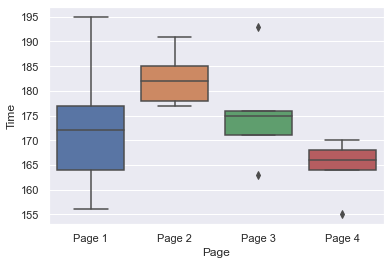

In [154]:
sns.boxplot(data = four_sessions, x = 'Page', y = 'Time')


The procedure used to test this is ANOVA. The basis for it can be seen in the following resampling procedure (specified here for the A/B/C/D test of web page stickiness):

1. Combine all the data together in a single box.
2. Shuffle and draw out four resamples of five values each.
3. Record the mean of each of the four groups.
4. Record the variance among the four group means.
5. Repeat steps 2–4 many (say, 1,000) times.

What proportion of the time did the resampled variance exceed the observed variance? This is the p-value.

This type of permutation test is a bit more involved than the type used in “Permutation
Test” we saw earlier.

In [155]:
observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)
# Permutation test example with stickiness
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var()[0]
    
print(perm_test(four_sessions))

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
15.373333333333406


Pr(Prob) 0.07966666666666666


Text(0, 0.5, 'Frequency')

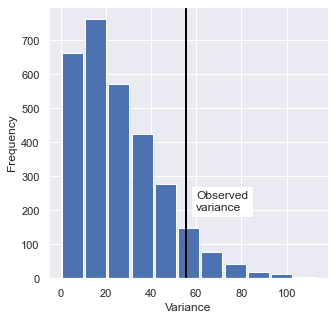

In [157]:
random.seed(1)
perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x = observed_variance, color='black', lw=2)
ax.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')


The $p-value$, given by `Pr(Prob)`, is $0.07966$. In other words, given the same underlying stickiness, $7.9\%$ of the time the response rate among four pages might differ as much as was actually observed, just by chance. This degree of improbability falls short of the traditional statistical threshold of $5\%$, so we conclude that the difference
among the four pages could have arisen by chance.

#### F-Statistic

Just like the $t-test$ can be used instead of a permutation test for comparing the mean of two groups, there is a statistical test for ANOVA based on the $F-statistic$. The F-statistic is based on the ratio of the variance across group means (i.e., the treatment effect) to the variance due to residual error. The higher this ratio, the more statistically significant the result. If the data follows a normal distribution, then statistical theory dictates that the statistic should have a certain distribution. Based on this, it is possible to compute a $p-value$.

The `statsmodels` package provides an ANOVA implementation in Python:

In [158]:
import statsmodels.formula.api as smf

model = smf.ols('Time ~ Page', data=four_sessions).fit()
                
aov_table = sm.stats.anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq         F    PR(>F)
Page       3.0   831.4  277.133333  2.739825  0.077586
Residual  16.0  1618.4  101.150000       NaN       NaN


In [159]:
res = stats.f_oneway(four_sessions[four_sessions.Page == 'Page 1'].Time, 
                     four_sessions[four_sessions.Page == 'Page 2'].Time,
                     four_sessions[four_sessions.Page == 'Page 3'].Time,
                     four_sessions[four_sessions.Page == 'Page 4'].Time)
print(f'F-Statistic: {res.statistic / 2:.4f}')
print(f'p-value: {res.pvalue / 2:.4f}')

F-Statistic: 1.3699
p-value: 0.0388


`df` is “degrees of freedom,” `sum_sq` is “sum of squares,” `mean_sq` is “mean squares” (short for mean-squared deviations), and `F` value is the F-statistic. For the grand average, sum of squares is the departure of the grand average from 0, squared, times 20 (the number of observations). The degrees of freedom for the grand average is 1, by definition.

For the treatment means, the degrees of freedom is 3 (once three values are set, and then the grand average is set, the other treatment mean cannot vary). Sum of squares for the treatment means is the sum of squared departures between the treatment means and the grand average.

For the residuals, degrees of freedom is 20 (all observations can vary), and SS is the sum of squared difference between the individual observations and the treatment means. Mean squares (MS) is the sum of squares divided by the degrees of freedom.
The F-statistic is MS(treatment)/MS(error). The F value thus depends only on this ratio and can be compared to a standard F-distribution to determine whether the differences among treatment means are greater than would be expected in random
chance variation.


#### Two-Way ANOVA

The A/B/C/D test just described is a “one-way” ANOVA, in which we have one factor (group) that is varying. We could have a second factor involved—say, “weekend versus weekday”—with data collected on each combination (group A weekend, group A weekday, group B weekend, etc.). This would be a “two-way ANOVA,” and we would handle it in similar fashion to the one-way ANOVA by identifying the “interaction effect.” After identifying the grand average effect and the treatment effect, we then
separate the weekend and weekday observations for each group and find the difference between the averages for those subsets and the treatment average. 

You can see that ANOVA and then two-way ANOVA are the first steps on the road toward a full statistical model, such as regression and logistic regression, in which multiple factors and their effects can be modeled

#### Chi-Square Test

Web testing often goes beyond A/B testing and tests multiple treatments at once. The chi-square test is used with count data to test how well it fits some expected distribution. The most common use of the chi-square statistic in statistical practice is with $r × c$ contingency tables, to assess whether the null hypothesis of independence among variables is reasonable.

#### Chi-Square Test: A Resampling Approach

Suppose you are testing three different headlines—A, B, and C—and you run them each on 1,000 visitors, with the results shown in table below - 

-|Headline A|Headline B|Headline C|
--|--|--|--|
Click|14|8|12|
No click|986|992|988|

The headlines certainly appear to differ. Headline A returns nearly twice the click rate of B. The actual numbers are small, though. A resampling procedure can test whether the click rates differ to an extent greater than chance might cause. For this test, we need to have the “expected” distribution of clicks, and in this case, that would be under the null hypothesis assumption that all three headlines share the same click rate, for an overall click rate of 34/3,000. Under this assumption, our contingency table would look like

-|Headline A|Headline B|Headline C|
--|--|--|--|
Click|11.333|11.333|11.333|
No click|988.67|988.67|988.67|

The *Pearson residual* is defined as:

$$R = \frac{Observed−Expected}{\sqrt{Expected}}$$

R measures the extent to which the actual counts differ from these expected counts.



-|Headline A|Headline B|Headline C|
--|--|--|--|
Click|0.792|-0.990|0.198|
No click|-0.085|0.106|-0.021|

The chi-square statistic is defined as the sum of the squared Pearson residuals:

$$\chi^2 =Σ_i^rΣ_j^cR^2$$

where $r$ and $c$ are the number of rows and columns, respectively. The chi-square statistic for this example is $1.666$. Is that more than could reasonably occur in a chance
model?

In [161]:
res = [.792, -.990, .198, -.085, .106, -0.021]
res = np.array(res)
np.sum(res**2)

1.66547

We can test with this resampling algorithm:

1. Constitute a box with 34 ones (clicks) and 2,966 zeros (no clicks).
2. Shuffle, take three separate samples of 1,000, and count the clicks in each.
3. Find the squared differences between the shuffled counts and the expected counts and sum them.
4. Repeat steps 2 and 3, say, 1,000 times.
5. How often does the resampled sum of squared deviations exceed the observed? That’s the p-value.

To run a permutation test in Python, use the following implementation:

In [2]:
click_rate = pd.read_csv('data/data/click_rates.csv')
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')
print(clicks)

Headline  Headline A  Headline B  Headline C
Click                                       
Click             14           8          12
No-click         986         992         988


In [3]:
clicks.values

array([[ 14,   8,  12],
       [986, 992, 988]], dtype=int64)

In [4]:
click_rate.sample(5)

,Headline,Click,Rate
4,Headline C,Click,12
0,Headline A,Click,14
1,Headline A,No-click,986
3,Headline B,No-click,992
2,Headline B,Click,8


In [16]:
# Table 3-5
row_average = clicks.mean(axis=1)
pd.DataFrame({
    'Headline A': row_average,
    'Headline B': row_average,
    'Headline C': row_average,
})

,Headline A,Headline B,Headline C
Click,,,
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


To run a permutation test in Python, use the following implementation:

In [8]:
# Resampling approach
import random
box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect
                                  for observe in row])
    # return sum of squares
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [34 / 3, 1000 - 34 / 3]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.5060


#### Chi-Square Test: Statistical Theory

Asymptotic statistical theory shows that the distribution of the chi-square statistic can be approximated by a chi-square distribution (see “Chi-Square Distribution” earlier). The appropriate standard chi-square distribution is determined by the
degrees of freedom. For a contingency table, the degrees of freedom are related to the number of rows (r) and columns (c) as
follows:

$$degrees\ of\ freedom = (r − 1)×(c − 1)$$

The chi-square distribution is typically skewed, with a long tail to the right; see figure below for the distribution with 1, 2, 5, and 20 degrees of freedom. The further out on the chi-square distribution the observed statistic is, the lower the p-value.

![](images/chisq.png)

In Python, use the function `scipy.stats.chi2_contingency`:

In [7]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')
print('df:',df)
print('expected: ', expected)

Observed chi2: 1.6659
p-value: 0.4348
df: 2
expected:  [[ 11.33333333  11.33333333  11.33333333]
 [988.66666667 988.66666667 988.66666667]]


In [13]:
from scipy.stats import chi2

1-chi2.cdf(chisq,2)

0.4347562562343731


The p-value is a little less than the resampling p-value; this is because the chi-square distribution is only an approximation of the actual distribution of the statistic.

##### My comment

See following steps

In [15]:
clicks.values

array([[ 14,   8,  12],
       [986, 992, 988]], dtype=int64)

In [29]:

row_average = clicks.mean(axis=1)
exp_val = pd.DataFrame({
    'Headline A': row_average,
    'Headline B': row_average,
    'Headline C': row_average,
})


In [34]:
from scipy.stats import chisquare as chi

chi(clicks.values, exp_val, ddof = 3, axis = None,) 
#why ddof=3 giving correct result?
#may be because ddof =/= df and, per docs, df is k-1-ddof. Here k, frequency segments, is 2*3=6 and df = 2. So ddof=3

Power_divergenceResult(statistic=1.6659394708658917, pvalue=0.4347562562343731)

#### Fisher's Exact Test

--skipped--

#### Multi-Arm Bandit Algorithm

--skipped--

#### Scientific Fraud



Text(0, 0.5, 'Frequency')

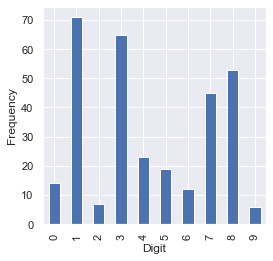

In [169]:
imanishi = pd.read_csv('data/data/imanishi_data.csv')
imanishi.columns = [c.strip() for c in imanishi.columns]
ax = imanishi.plot.bar(x='Digit', y=['Frequency'], legend=False,
                      figsize=(4, 4))
ax.set_xlabel('Digit')
ax.set_ylabel('Frequency')

In [170]:
imanishi.sample(5)

,Digit,Frequency
0,0,14
9,9,6
5,5,19
2,2,7
4,4,23


In [171]:
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 116602.393


In [172]:
effect_size = sm.stats.proportion_effectsize(0.0165, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 5488.408


#### $\S$ END OF CHAPTER THREE$\S$

### CHAPTER 4 - REGRESSION AND PREDICTION

Nowhere is the nexus between statistics and data science stronger than in the realm of prediction—specifically, the prediction of an outcome (target) variable based on the values of other “predictor” variables. This process of training a model on data where the outcome is known, for subsequent application to data where the outcome is not known, is termed supervised learning. Another important connection between data science and statistics is in the area of anomaly detection, where regression diagnostics originally intended for data analysis and improving the regression model can be used
to detect unusual records.

#### Simple Linear Regression

Simple linear regression provides a model of the relationship between the magnitude of one variable and that of a second—for example, as $X$ increases, $Y$ also increases. Or as $X$ increases, $Y$ decreases. Correlation is another way to measure how two variables are related. The difference is that while correlation measures the *strength* of an association between two variables, regression quantifies the *nature* of the relationship.

##### Key Terms for Simple Linear Regression

 - Response - The variable we are trying to predict. Synonyms - dependent variable, $Y$ variable, target, outcome
 
 - Independent variable - The variable used to predict the response. Synonyms - $X$ variable, feature, attribute, predictor

 - Record - The vector of predictor and outcome values for a specific individual or case. Synonyms -  row, case, instance, example

 - Intercept - The intercept of the regression line—that is, the predicted value when $X = 0$. Synonyms -  $b_0$, $β_0$

 - Regression coefficient - The slope of the regression line. Synonyms - slope, $b_1$, $β_1$, parameter estimates, weights

 - Fitted values - The estimates $Y_i$ obtained from the regression line. Synonym - predicted values

 - Residuals - The difference between the observed values and the fitted values. Synonym - errors

 - Least squares - The method of fitting a regression by minimizing the sum of squared residuals. Synonyms - ordinary least squares, OLS

#### The Regression Equation

Simple linear regression estimates how much $Y$ will change when $X$ changes by a certain amount. With the correlation coefficient, the variables $X$ and $Y$ are interchangeable. With regression, we are trying to predict the $Y$ variable from $X$ using a linear relationship (i.e., a line):

$$Y = b_0 + b_1X$$

We read this as “$Y$ equals $b_1$ times $X$, plus a constant $b_0$.” The symbol $b_0$ is known as the *intercept* (or constant), and the symbol $b_1$ as the *slope* for $X$. The $Y$ variable is known as the *response* or dependent variable since it depends on $X$. The $X$ variable is known as the *predictor* or *independent variable*. The machine
learning community tends to use other terms, calling $Y$ the target and $X$ a feature vector.

Consider the scatterplot shown below displaying the number of years a worker was exposed to cotton dust (`Exposure`) versus a measure of lung capacity (`PEFR` or “peak expiratory flow rate”). How is `PEFR` related to `Exposure`? It’s hard to tell based just on the picture.

In [11]:
#some imports specific to this chapter

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence


In [12]:
lung = pd.read_csv('data/data/LungDisease.csv')

lung.sample(5)
#lung.plot.scatter(x='Exposure', y='PEFR')

,PEFR,Exposure
47,500,13
5,280,2
85,210,20
79,400,19
46,490,13


<AxesSubplot:xlabel='Exposure', ylabel='PEFR'>

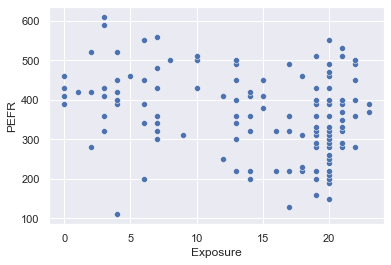

In [13]:
sns.scatterplot(x = lung.Exposure, y = lung.PEFR)

Simple linear regression tries to find the “best” line to predict the response PEFR as a function of the predictor variable Exposure:

$$PEFR = b_0 + b_1Exposure$$

In Python, we can use `LinearRegression` from the scikit-learn package. (the `statsmodels` package has a linear regression implementation that is more similar to R (`sm.OLS`); we will use it later in this chapter):

In [14]:
X = lung.Exposure.to_numpy()[:, None] #sklearn X needs to be 2-d data
X.shape

(122, 1)

In [15]:
model = LinearRegression()

model.fit(X, lung.PEFR)

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


In [16]:
model.intercept_

424.582806573957

Text(12, 390, '$b_1 = \\frac{\\Delta Y}{\\Delta X}$')

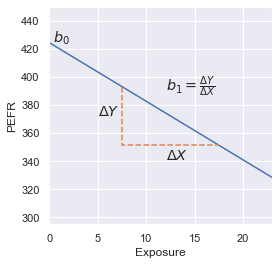

In [17]:
fig, ax = plt.subplots(figsize=(4, 4))
plt.xlim(0, 23)
plt.ylim(295, 450)
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.plot((0, 23), model.predict([[0], [23]]))
plt.text(0.4, model.intercept_, r'$b_0$', size='larger')

x = [[7.5], [17.5]]
y = model.predict(x)
plt.plot((7.5, 7.5, 17.5), (y[0], y[1], y[1]), '--')
plt.text(5, np.mean(y), r'$\Delta Y$', size='larger')
plt.text(12, y[1] - 10, r'$\Delta X$', size='larger')
plt.text(12, 390, r'$b_1 = \frac{\Delta Y}{\Delta X}$', size='larger')

#### Fitted Values and Residuals

Important concepts in regression analysis are the fitted values (the predictions) and *residuals* (prediction errors). In general, the data doesn’t fall exactly on a line, so the regression equation should include an explicit error term $e_i$:

$$Y_i = b_0 + b_1X_i + e_i$$

The fitted values, also referred to as the predicted values, are typically denoted by $\hat{Y_i}$
(Y-hat). These are given by:

$$\hat{Y_i} = \hat{b_0} + \hat{b_1}X_i$$

The notation $\hat{b_0}$ and $\hat{b_1}$ indicates that the coefficients are estimated versus known.

We compute the residuals $\hat{e_i}$ by subtracting the predicted values from the original
data:

$$\hat{e_i} = Y_i − \hat{Y_i}$$

In [18]:
fitted = model.predict(X)
residuals = lung.PEFR - fitted

residuals[:5]

0   -34.582807
1   -14.582807
2     5.417193
3    35.417193
4    -0.398230
Name: PEFR, dtype: float64

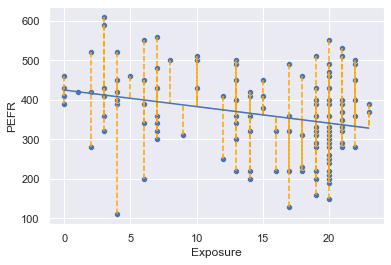

In [19]:
#plot-code is different from the book 
sns.scatterplot(x= lung.Exposure, y = lung.PEFR)
sns.lineplot(x = lung.Exposure, y = fitted)
plt.vlines(lung.Exposure, lung.PEFR, fitted, color = 'orange', linestyles = '--' )

#### Least Squares

How is the model fit to the data? When there is a clear relationship, you could imagine fitting the line by hand. In practice, the regression line is the estimate that minimizes the sum of squared residual values, also called the residual sum of squares or RSS:

$$RSS = \sum_{i = 1}^n({Y_i − \hat{Y_i}})^2$$

or 

$$RSS = \sum_{i = 1}^n({Y_i − \hat{b_0}-\hat{b_1}{x_i}})^2$$

The estimates $\hat{b_0}$ and $\hat{b_1}$ are the values that minimize RSS.
The method of minimizing the sum of the squared residuals is termed least squares
regression, or ordinary least squares (OLS) regression.

#### Multiple Linear Regression

When there are multiple predictors, the equation is simply extended to accommodate them:

$$Y = b_0 + b_1X_1 + b_2X_2 + \dots + b_pX_p + e$$

Instead of a line, we now have a linear model—the relationship between each coefficient
and its variable (feature) is linear.

##### Key Terms for Multiple Linear Regression

- Root mean squared error - The square root of the average squared error of the regression (this is the most widely used metric to compare regression models). Synonym - RMSE

- Residual standard error - The same as the root mean squared error, but adjusted for degrees of freedom. Synonym - RSE

- R-squared - The proportion of variance explained by the model, from 0 to 1. Synonyms -  coefficient of determination, $R^2$
 
- t-statistic - The coefficient for a predictor, divided by the standard error of the coefficient, giving a metric to compare the importance of variables in the model.

- Weighted regression - Regression with the records having different weights.

All of the other concepts in simple linear regression, such as fitting by least squares and the definition of fitted values and residuals, extend to the multiple linear regression setting. For example, the fitted values are given by:

$$\hat{Y_i} = \hat{b_0}+\hat{b_1}X_{1,i}+\dots+\hat{b_p}X_{p,i}$$

#### Example: King County Housing Data

An example of using multiple linear regression is in estimating the value of houses.
County assessors must estimate the value of a house for the purposes of assessing
taxes. Real estate professionals and home buyers consult popular websites such as Zillow
to ascertain a fair price. Here are a few rows of housing data from King County
(Seattle), Washington,

In [20]:
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
          'Bedrooms', 'BldgGrade']

house = pd.read_csv('data/data/house_sales.csv', sep='\t')
print(house[subset].head())

   AdjSalePrice  SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade
1      300805.0           2400     9373       3.00         6          7
2     1076162.0           3764    20156       3.75         4         10
3      761805.0           2060    26036       1.75         4          8
4      442065.0           3200     8618       3.75         5          7
5      297065.0           1720     8620       1.75         4          7


The goal is to predict the sales price from the other variables. scikit-learn’s `LinearRegression` can be used for multiple linear regression as well:

In [21]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

LinearRegression()

For a `LinearRegression` model, intercept and coefficients are the fields `intercept_`
and `coef_` of the fitted model:


In [22]:
print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')

for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.8306036024065
 SqFtLot: -0.060466820653054754
 Bathrooms: -19442.84039832092
 Bedrooms: -47769.955185214436
 BldgGrade: 106106.96307898116


The interpretation of the coefficients is as with simple linear regression: the predicted value $\hat{Y}$ changes by the coefficient $b_j$ for each unit change in $X_j$ assuming all the other variables, $X_k$ for $k ≠ j$, remain the same. For example, adding an extra finished square foot to a house increases the estimated value by roughly $\$229$; adding 1,000 finished square feet implies the value will increase by $\$228,800$.

### Assessing the Model

The most important performance metric from a data science perspective is *root mean squared error*, or RMSE. RMSE is the square root of the average squared error in the predicted $\hat{y_i}$ values:

$$RMSE = \sqrt \frac{\sum_{i=1}^n(y_i-\hat{y_i})^2}{n}$$

This measures the overall accuracy of the model and is a basis for comparing it to other models (including models fit using machine learning techniques). Similar to RMSE is the *residual standard error*, or RSE. In this case we have $p$ predictors, and the RSE is given by:

$$RSE = \sqrt \frac{\sum_{i=1}^n(y_i-\hat{y_i})^2}{n-p-1}$$

The only difference is that the denominator is the degrees of freedom, as opposed to number of records. In practice, for linear regression, the difference between RMSE and RSE is very small, particularly for big data applications.

scikit-learn provides a number of metrics for regression and classification. Here, we use `mean_squared_error` to get RMSE and `r2_score` for the coefficient of determination:



In [23]:
fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')



RMSE: 261220
r2: 0.5406


Use `statsmodels` to get a more detailed analysis of the regression model in Python:

In [24]:
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:58:00   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The pandas method assign, as used here, adds a constant column with value 1 to the predictors. This is required to model the intercept.

Another useful metric that you will see in software output is the *coefficient of determination*, also called the R-squared statistic or $R^2$. R-squared ranges from $0$ to $1$ and measures the proportion of variation in the data that is accounted for in the model. It is useful mainly in explanatory uses of regression where you want to assess how well the model fits the data. The formula for $R^2$ is:

$$R^2 = 1- \frac{\sum_{i=1}^n(y_i-\hat{y_i})^2} {\sum_{i=1}^n(y_i-\bar{y})^2}$$

In [25]:
numerator = ((house[outcome] - fitted)**2).sum()
denominator = ((house[outcome]- house[outcome].mean())**2).sum()

1 - (numerator/denominator)

0.5405875253381902

You can see the value calculated above is same as calculated by scikit-learn function and `statsmodels` function.

The denominator is proportional to the variance of Y. The output from `statsmodels` also reports an adjusted R-squared, which adjusts for the degrees of freedom, effectively penalizing the addition of more predictors to a model. Seldom is this significantly different from R-squared in multiple regression with large data sets.

Along with the estimated coefficients, `statsmodels` report the standard error of the coefficients (SE) and a t-statistic:

$$t_b = \frac{\hat{b}}{SE(\hat{b})}$$

The t-statistic—and its mirror image, the p-value—measures the extent to which a coefficient is “statistically significant”—that is, outside the range of what a random chance arrangement of predictor and target variable might produce. The higher the t-statistic (and the lower the p-value), the more significant the predictor. Since parsimony is a valuable model feature, it is useful to have a tool like this to guide choice of variables to include as predictors.

**Note**
In addition to the t-statistic, R and other packages will often report a p-value (Pr(>|t|) in the R output) and F-statistic. Data scientists do not generally get too involved with the interpretation of these statistics, nor with the issue of statistical significance. Data scientists primarily focus on the t-statistic as a useful guide for whether to include a predictor in a model or not. High t-statistics (which go with p-values near 0) indicate a predictor should be retained in a
model, while very low t-statistics indicate a predictor could be dropped.

#### Cross-Validation

Classic statistical regression metrics ($R^2$, F-statistics, and p-values) are all “in-sample” metrics—they are applied to the same data that was used to fit the model. Intuitively, you can see that it would make a lot of sense to set aside some of the original data, not use it to fit the model, and then apply the model to the set-aside (holdout) data to see
how well it does. Normally, you would use a majority of the data to fit the model and use a smaller portion to test the model.

This idea of “out-of-sample” validation is not new, but it did not really take hold until larger data sets became more prevalent; with a small data set, analysts typically want to use all the data and fit the best possible model. Using a holdout sample, though, leaves you subject to some uncertainty that arises simply from variability in the small holdout sample. How different would the assessment be if you selected a different holdout sample?

Cross-validation extends the idea of a holdout sample to multiple sequential holdout samples. The algorithm for basic *k-fold cross-validation* is as follows:

1. Set aside 1/k of the data as a holdout sample.
2. Train the model on the remaining data.
3. Apply (score) the model to the 1/k holdout, and record needed model assessment
metrics.
4. Restore the first 1/k of the data, and set aside the next 1/k (excluding any records
that got picked the first time).
5. Repeat steps 2 and 3.
6. Repeat until each record has been used in the holdout portion.
7. Average or otherwise combine the model assessment metrics.

The division of the data into the training sample and the holdout sample is also called a *fold*.

#### Model Selection and Stepwise Regression

In some problems, many variables could be used as predictors in a regression. For
example, to predict house value, additional variables such as the basement size or
year built could be used.

In [26]:
house.NewConstruction[:4]

1    False
2     True
3    False
4    False
Name: NewConstruction, dtype: bool

In [27]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 
              'NewConstruction']

X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:58:13   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving       

Adding more variables, however, does not necessarily mean we have a better model. Statisticians use the principle of **Occam’s razor** to guide the choice of a model: all things being equal, a simpler model should be used in preference to a more complicated model.

Including additional variables always reduces RMSE and increases $R^2$ for the training data. Hence, these are not appropriate to help guide the model choice. One approach to including model complexity is to use the adjusted $R^2$:


$$R^2_{adj} = 1-(1-R^2)\frac{n-1}{n-P-1}$$

Here, $n$ is the number of records and $P$ is the number of variables in the model.

In the 1970s, Hirotugu Akaike, the eminent Japanese statistician, developed a metric called **AIC** (Akaike’s Information Criteria) that penalizes adding terms to a model. In the case of regression, AIC has the form:

$$AIC = 2P + n log(RSS/n)$$

where $P$ is the number of variables and $n$ is the number of records. The goal is to find the model that minimizes AIC; models with $k$ more extra variables are penalized by $2k$.

How do we find the model that minimizes AIC or maximizes adjusted $R^2$? One way is to search through all possible models, an approach called all *subset regression*. This is computationally expensive and is not feasible for problems with large data and many variables. An attractive alternative is to use *stepwise regression*. It could start with a full model and successively drop variables that don’t contribute meaningfully. This is called backward elimination. Alternatively one could start with a constant model and successively add variables (*forward selection*). As a third option we can also successively
add and drop predictors to find a model that lowers AIC or adjusted $R^2$.

`scikit-learn` has no implementation for stepwise regression. We implemented functions `stepwise_selection`, `forward_selection`, and `backward_elimination` in our `dmba` package:

**Note**

The preceeding section make use of authors' `dmba` package which I was unable to install right now. That part is skipped for now.  

Update - `dmba` isntalled through `pip3`

In [28]:
from dmba import stepwise_selection
from dmba import AIC_score

y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, 
                                                verbose=True)

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None

Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.27755304201634
 BldgGrade: 137159.56022619997
 YrBuilt: -3565.4249392492684
 Bedrooms: -51947.38367361342
 Bathrooms: 42396.164527717905
 PropertyType_Townhouse: 84479.1620330042
 SqFtFinBasement: 7.046974967583083
 PropertyType_Single Family: 22912.055187018057


The function chose a model in which several variables were dropped from house_full: `SqFtLot`, `NbrLivingUnits`, `YrRenovated`, and `NewConstruction`.

Simpler yet are forward selection and backward selection. In forward selection, you start with no predictors and add them one by one, at each step adding the predictor that has the largest contribution to $R^2$, and stopping when the contribution is no longer statistically significant. In backward selection, or *backward elimination*, you start with the full model and take away predictors that are not statistically significant until you are left with a model in which all predictors are statistically significant. 

*Penalized regression* is similar in spirit to AIC. Instead of explicitly searching through a discrete set of models, the model-fitting equation incorporates a constraint that penalizes the model for too many variables (parameters). Rather than eliminating predictor variables entirely—as with stepwise, forward, and backward selection— penalized regression applies the penalty by reducing coefficients, in some cases to near zero. Common penalized regression methods are *ridge regression* and *lasso regression*.

#### Weighted Regression

Weighted regression is used by statisticians for a variety of purposes; in particular, it is important for analysis of complex surveys. Data scientists may find weighted regression useful in two cases:

• Inverse-variance weighting when different observations have been measured with different precision; the higher variance ones receiving lower weights.

• Analysis of data where rows represent multiple cases; the weight variable encodes how many original observations each row represents.

For example, with the housing data, older sales are less reliable than more recent
sales. Using the `DocumentDate` to determine the year of the sale, we can compute a Weight as the number of years since 2005 (the beginning of the data):

In [29]:
house.columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

We can calculate the Year from the date column using either a list comprehension or the data frame's `apply` method.

In [30]:
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]
house['Year'] = house.DocumentDate.apply(lambda d: int(d.split('-')[0]))
house['Weight'] = house.Year - 2005

In [31]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight=house.Weight)
pd.DataFrame({
    'predictor': predictors,
    'house_lm': house_lm.coef_,
    'house_wt': house_wt.coef_,
}).append({
    'predictor': 'intercept', 
    'house_lm': house_lm.intercept_,
    'house_wt': house_wt.intercept_,
}, ignore_index=True)

,predictor,house_lm,house_wt
0,SqFtTotLiving,228.830604,245.024089
1,SqFtLot,-0.060467,-0.292415
2,Bathrooms,-19442.840398,-26085.970109
3,Bedrooms,-47769.955185,-53608.876436
4,BldgGrade,106106.963079,115242.434726
5,intercept,-521871.368188,-584189.329446


The coefficients in the weighted regression are slightly different from the original regression.

In [32]:
residuals = pd.DataFrame({
    'abs_residual_lm': np.abs(house_lm.predict(house[predictors]) - house[outcome]),
    'abs_residual_wt': np.abs(house_wt.predict(house[predictors]) - house[outcome]),
    'Year': house['Year'],
})
print(residuals.head())
# axes = residuals.boxplot(['abs_residual_lm', 'abs_residual_wt'], by='Year', figsize=(10, 4))
# axes[0].set_ylim(0, 300000)

pd.DataFrame(([year, np.mean(group['abs_residual_lm']), np.mean(group['abs_residual_wt'])] 
              for year, group in residuals.groupby('Year')),
             columns=['Year', 'mean abs_residual_lm', 'mean abs_residual_wt'])
# for year, group in residuals.groupby('Year'):
#     print(year, np.mean(group['abs_residual_lm']), np.mean(group['abs_residual_wt']))

   abs_residual_lm  abs_residual_wt  Year
1    123750.814194    107108.553965  2014
2     59145.413089     96191.882094  2006
3    190108.725716    187004.492880  2007
4    198788.774412    196132.996857  2008
5     91774.996129     84277.577512  2013


,Year,mean abs_residual_lm,mean abs_residual_wt
0,2006,140540.303585,146557.454636
1,2007,147747.577959,152848.523235
2,2008,142086.905943,146360.411668
3,2009,147016.720883,151182.924825
4,2010,163267.674885,166364.476152
5,2011,169937.385744,172950.876028
6,2012,169506.670053,171874.424266
7,2013,203659.777510,206242.199403
8,2014,184452.840665,186668.573750
9,2015,172323.435147,169842.742053


#### The Dangers of Extrapolation

--skipped--

#### Confidence and Prediction Inervals

--skipped--



#### Factor Variables in Regression

Factor variables, also termed categorical variables, take on a limited number of discrete values. For example, a loan purpose can be “debt consolidation,” “wedding,” “car,” and so on. The binary (yes/no) variable, also called an indicator variable, is a special case of a factor variable. Regression requires numerical inputs, so factor variables need to be recoded to use in the model. The most common approach is to convert a variable into a set of binary *dummy* variables.

##### Key Terms for Factor Variables

- Dummy variables - Binary 0–1 variables derived by recoding factor data for use in regression and other models.

- Reference coding - The most common type of coding used by statisticians, in which one level of a factor is used as a reference and other factors are compared to that level. Synonym - treatment coding

- One hot encoder - A common type of coding used in the machine learning community in which all factor levels are retained. While useful for certain machine learning algorithms, this approach is not appropriate for multiple linear regression.

- Deviation coding - A type of coding that compares each level against the overall mean as opposed to the reference level. Synonym - sum contrasts

#### Dummy Variables Representation

In the King County housing data, there is a factor variable for the property type which can only take following values - 



In [33]:
house.PropertyType.unique()

array(['Multiplex', 'Single Family', 'Townhouse'], dtype=object)

To use this factor variable, we need to convert it to a set of binary variables. We do this by creating a binary variable for each possible value of the factor variable. In Python, we can convert categorical variables to dummies using the pandas method `get_dummies`:

In [34]:
print(pd.get_dummies(house['PropertyType']).head(6)) #1

   Multiplex  Single Family  Townhouse
1          1              0          0
2          0              1          0
3          0              1          0
4          0              1          0
5          0              1          0
6          0              0          1


In [35]:
print(pd.get_dummies(house['PropertyType'], drop_first=True).head(6)) #2

   Single Family  Townhouse
1              0          0
2              1          0
3              1          0
4              1          0
5              1          0
6              0          1


**Note**

#1 Above method, by default, returns one hot encoding of the categorical variable.

#2 The keyword argument `drop_first` will return `P – 1` columns. Use this to avoid the problem of multicollinearity (explained later).

In the regression setting, a factor variable with P distinct levels is usually represented by a matrix with only $P – 1$ columns. This is because a regression model typically includes an intercept term. With an intercept, once you have defined the values for $P – 1$ binaries, the value for the $P$th is known and could be considered redundant. Adding the $P$th column will cause a multicollinearity error

In [36]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType']

X = pd.get_dummies(house[predictors], drop_first=True)

house_lm_factor = LinearRegression()
house_lm_factor.fit(X, house[outcome])

print(f'Intercept: {house_lm_factor.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print(f' {name}: {coef}')

Intercept: -446841.366
Coefficients:
 SqFtTotLiving: 223.37362892503694
 SqFtLot: -0.07036798136811839
 Bathrooms: -15979.01347341506
 Bedrooms: -50889.73218483035
 BldgGrade: 109416.3051614621
 PropertyType_Single Family: -84678.21629549228
 PropertyType_Townhouse: -115121.97921609154


The output from the R regression shows two coefficients corresponding to `Property` Type: `PropertyTypeSingle Family` and `PropertyTypeTownhouse`. There is no coefficient of `Multiplex` since it is implicitly defined when `PropertyTypeSingle Family == 0` and `PropertyTypeTownhouse == 0`. The coefficients are interpreted as relative to `Multiplex`, so a home that is Single Family is worth almost \$85,000 less, and a home that is `Townhouse` is worth over \$150,000 less.

#### Factor Variables with Many Levels

Some factor variables can produce a huge number of binary dummies—zip codes are a factor variable, and there are 43,000 zip codes in the US. In such cases, it is useful to explore the data, and the relationships between predictor variables and the outcome, to determine whether useful information is contained in the categories. If so, you must further decide whether it is useful to retain all factors, or whether the levels should be consolidated.

In King County, there are 80 zip codes with a house sale:

In [37]:
print(pd.DataFrame(house['ZipCode'].value_counts()))

       ZipCode
98038      788
98103      671
98042      641
98115      620
98117      619
...        ...
98288        4
98224        3
98068        1
98113        1
98043        1

[80 rows x 1 columns]


ZipCode is an important variable, since it is a proxy for the effect of location on the value of a house. Including all levels requires 79 coefficients corresponding to 79 degrees of freedom. The original model house_lm has only 5 degrees of freedom. Moreover, several zip codes have only one sale. In some problems, you can consolidate a zip code using the first two or three digits, corresponding to a submetropolitan geographic region. For King County, almost all
of the sales occur in 980xx or 981xx, so this doesn’t help.

An alternative approach is to group the zip codes according to another variable, such as sale price. Even better is to form zip code groups using the residuals from an initial model.

In Python we can calculate this information as follows:

In [38]:
#need to understand this code
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])


zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    })
    .groupby(['ZipCode'])
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual')
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)
zip_groups.head()


,ZipCode,count,median_residual,cum_count,ZipGroup
36,98057,4,-537321.644462,4,0
27,98043,1,-307661.343614,5,0
46,98092,289,-193569.183599,294,0
23,98038,788,-150066.477035,1082,0
31,98051,32,-142352.869593,1114,0


In [39]:
print(zip_groups.ZipGroup.value_counts().sort_index())

0    16
1    16
2    16
3    16
4    16
Name: ZipGroup, dtype: int64


In [44]:
to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on='ZipCode')
house['ZipGroup'] = house['ZipGroup'].astype('category')


The concept of using the residuals to help guide the regression fitting is a fundamental step in the modeling process.

#### Ordered Factor Variables

Some factor variables reflect levels of a factor; these are termed ordered factor variables or ordered categorical variables. For example, the loan grade could be A, B, C, and so on—each grade carries more risk than the prior grade. Often, ordered factor variables can be converted to numerical values and used as is. For example, the variable `BldgGrade` is an ordered factor variable. Several of the types of grades are shown in Table below. While the grades have specific meaning, the numeric value is ordered from low to high, corresponding to higher-grade homes. With the regression model `house_lm`, fit in “Multiple Linear Regression” section, `BldgGrade` was treated as a numeric variable.

Value|Description
-----|----------
1|Cabin
2|Substandard
5|Fair
10|Very Good 
12|Luxury
13|Mansion

Treating ordered factors as a numeric variable preserves the information contained in
the ordering that would be lost if it were converted to a factor.

In [45]:
house.BldgGrade.unique()

array([ 7, 10,  8,  6,  9,  5, 11, 12, 13,  4,  3], dtype=int64)

#### Interpreting the Regression Equation

In data science, the most important use of regression is to predict some dependent (outcome) variable. In some cases, however, gaining insight from the equation itself to understand the nature of the relationship between the predictors and the outcome can be of value. This section provides guidance on examining the regression equation
and interpreting it.

#### Correlated Predictors

In multiple regression, the predictor variables are often correlated with each other. As an example, examine the regression coefficients for the model step_lm, fit in “Model Selection and Stepwise Regression”.

In [46]:
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.27755304201634
 BldgGrade: 137159.56022619997
 YrBuilt: -3565.4249392492684
 Bedrooms: -51947.38367361342
 Bathrooms: 42396.164527717905
 PropertyType_Townhouse: 84479.1620330042
 SqFtFinBasement: 7.046974967583083
 PropertyType_Single Family: 22912.055187018057


The coefficient for `Bedrooms` is negative! This implies that adding a bedroom to a house will reduce its value. How can this be? This is because the predictor variables are correlated: larger houses tend to have more bedrooms, and it is the size that drives house value, not the number of bedrooms. Consider two homes of the exact same size: it is reasonable to expect that a home with more but smaller bedrooms would be considered less desirable.

Having correlated predictors can make it difficult to interpret the sign and value of regression coefficients (and can inflate the standard error of the estimates). The variables for bedrooms, house size, and number of bathrooms are all correlated. This is illustrated by the following example, which fits another regression removing the variables `SqFtTotLiving`, `SqFtFinBasement`, and `Bathrooms` from the equation:




In [47]:
predictors = ['Bedrooms', 'BldgGrade', 'PropertyType', 'YrBuilt']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)

reduced_lm = LinearRegression()
reduced_lm.fit(X, house[outcome])


print(f'Intercept: {reduced_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, reduced_lm.coef_):
    print(f' {name}: {coef}')

Intercept: 4913973.344
Coefficients:
 Bedrooms: 27150.53723021644
 BldgGrade: 248997.7936621265
 YrBuilt: -3211.7448621551157
 PropertyType_Single Family: -19898.49534050021
 PropertyType_Townhouse: -47355.43687334228


Now the coefficient for bedrooms is positive—in line with what we would expect (though it is really acting as a proxy for house size, now that those variables have been removed).

Correlated variables are only one issue with interpreting regression coefficients. In `house_lm`, there is no variable to account for the location of the home, and the model is mixing together very different types of regions. Location may be a confounding variable; see “Confounding Variables” later for further discussion.

#### Multicollinearity

An extreme case of correlated variables produces multicollinearity—a condition in which there is redundance among the predictor variables. Perfect multicollinearity occurs when one predictor variable can be expressed as a linear combination of others.

Multicollinearity occurs when:

• A variable is included multiple times by error.

• P dummies, instead of P – 1 dummies, are created from a factor variable (see “Factor Variables in Regression” section).

• Two variables are nearly perfectly correlated with one another.

Multicollinearity in regression must be addressed—variables should be removed until the multicollinearity is gone. A regression does not have a well-defined solution in the presence of perfect multicollinearity. Many software packages, including R and Python, automatically handle certain types of multicollinearity. For example, if `SqFtTotLiving` is included twice in the regression of the house data, the results are the same as for the house_lm model.

#### Confounding Variables

With correlated variables, the problem is one of commission: including different variables that have a similar predictive relationship with the response. With confounding variables, the problem is one of omission: an important variable is not included in the regression equation. Naive interpretation of the equation coefficients can lead to invalid
conclusions.

Take, for example, the King County regression equation `house_lm` from “Example: King County Housing Data”. The regression coefficients of `SqFtLot`, `Bathrooms`, and `Bedrooms` are all negative. The original regression model does not contain a variable to represent location—a very important predictor of house price.

To model location, include a variable ZipGroup that categorizes the zip code into one of five groups, from least expensive (1) to most expensive (5)

In [48]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'ZipGroup']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)

confounding_lm = LinearRegression()
confounding_lm.fit(X, house[outcome])

print(f'Intercept: {confounding_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, confounding_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -666637.469
Coefficients:
 SqFtTotLiving: 210.61266005580097
 SqFtLot: 0.45498713854660444
 Bathrooms: 5928.425640001761
 Bedrooms: -41682.87184074476
 BldgGrade: 98541.18352725978
 PropertyType_Single Family: 19323.625287919338
 PropertyType_Townhouse: -78198.72092762396
 ZipGroup_1: 53317.17330659805
 ZipGroup_2: 116251.58883563541
 ZipGroup_3: 178360.53178793346
 ZipGroup_4: 338408.60185652046


`ZipGroup` is clearly an important variable: a home in the most expensive zip code group is estimated to have a higher sales price by almost \$340,000. The coefficients of `SqFtLot` and `Bathrooms` are now positive, and adding a bathroom increases the sale price by \$5,928.

The coefficient for `Bedrooms` is still negative. While this is unintuitive, this is a wellknown phenomenon in real estate. For homes of the same livable area and number of bathrooms, having more and therefore smaller bedrooms is associated with less valuable homes.

#### Interactions and Main Effects

Statisticians like to distinguish between main effects, or independent variables, and the interactions between the main effects. Main effects are what are often referred to as the predictor variables in the regression equation. An implicit assumption when only main effects are used in a model is that the relationship between a predictor variable and the response is independent of the other predictor variables. This is often not the case.

For example, the model fit to the King County Housing Data in “Confounding Variables” includes several variables as main effects, including ZipCode. Location in real estate is everything, and it is natural to presume that the relationship between, say, house size and the sale price depends on location. A big house built in a low-rent district is not going to retain the same value as a big house built in an expensive area.

You include interactions between variables in Python, we need to use the statsmodels package to train linear regression models with interactions.

In [49]:
model = smf.ols(formula='AdjSalePrice ~  SqFtTotLiving*ZipGroup + SqFtLot + ' +
     'Bathrooms + Bedrooms + BldgGrade + PropertyType', data=house)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3247.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:28:06   Log-Likelihood:            -3.1098e+05
No. Observations:               22687   AIC:                         6.220e+05
Df Residuals:                   22671   BIC:                         6.221e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

The statsmodels package takes care of categorical variables (e.g., `ZipGroup[T.1]`, `PropertyType[T.Single Family]`) and interaction terms (e.g., `SqFtTotLiving:ZipGroup[T.1]`).

Location and house size appear to have a strong interaction. For a home in the lowest `ZipGroup`, the slope is the same as the slope for the main effect `SqFtTotLiving`, which is \$118 per square foot (this is because R uses reference coding for factor variables; see “Factor Variables in Regression”). For a home in the highest `ZipGroup`, the slope is the sum of the main effect plus `SqFtTotLiving:ZipGroup5`, or \$115 + \$227 = \$342 per square foot. In other words, adding a square foot in the most expensive zip code group boosts the predicted sale price by a factor of almost three, compared to the average boost from adding a square foot.

#### Regression Diagnostics

In explanatory modeling (i.e., in a research context), various steps, in addition to the
metrics mentioned previously (see “Assessing the Model” on page 153), are taken to
assess how well the model fits the data; most are based on analysis of the residuals.
These steps do not directly address predictive accuracy, but they can provide useful
insight in a predictive setting.

#### Outliers

Generally speaking, an extreme value, also called an outlier, is one that is distant from most of the other observations. Just as outliers need to be handled for estimates of location and variability , outliers can cause problems with regression models. In regression, an outlier is a record whose actual y value is distant from the predicted value. You can detect outliers by examining the standardized residual, which is the residual divided by the standard error of the residuals.

There is no statistical theory that separates outliers from nonoutliers. Rather, there are (arbitrary) rules of thumb for how distant from the bulk of the data an observation needs to be in order to be called an outlier. For example, with the boxplot, outliers are those data points that are too far above or below the box boundaries where “too far” = “more than 1.5 times the interquartile range.” In regression, the standardized residual is the metric that is typically used to determine whether a record is classified as an outlier. Standardized residuals can be interpreted as “the number of standard errors away from the regression line.”

Let’s fit a regression to the King County house sales data for all sales in zip code 98105 -


In [50]:
house_98105 = house.loc[house['ZipCode'] == 98105, ]

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade']
outcome = 'AdjSalePrice'

house_outlier = sm.OLS(house_98105[outcome], house_98105[predictors].assign(const=1))
result_98105 = house_outlier.fit()
print(result_98105.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     238.7
Date:                Fri, 18 Feb 2022   Prob (F-statistic):          1.69e-103
Time:                        12:53:50   Log-Likelihood:                -4226.0
No. Observations:                 313   AIC:                             8464.
Df Residuals:                     307   BIC:                             8486.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   209.6023     24.408      8.587

In statsmodels, use `OLSInfluence` to analyze the residuals:


In [52]:
influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal
sresiduals.idxmin(), sresiduals.min()


(24333, -4.326731804078567)

The biggest overestimate from the model is more than four standard errors above the regression line, corresponding to an overestimate of $757,754. The original data record corresponding to this outlier is as follows

In [53]:
outlier = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome])
print(outlier[predictors])

AdjSalePrice 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


In this case, it appears that there is something wrong with the record: a house of that size typically sells for much more than $119,748 in that zip code. An excerpt from the statutory deed from this sale: it is clear that the sale involved only
partial interest in the property. In this case, the outlier corresponds to a sale that is anomalous and should not be included in the regression. Outliers could also be the result of other problems, such as a “fat-finger” data entry or a mismatch of units (e.g., reporting a sale in thousands of dollars rather than simply in dollars).

#### Influential Values

A value whose absence would significantly change the regression equation is termedan influential observation. In regression, such a value need not be associated with a large residual. As an example, consider the regression lines in plot shown below. 
The solid line corresponds to the regression with all the data, while the dashed line corresponds to the regression with the point in the upper-right corner removed. Clearly, that data value has a huge influence on the regression even though it is not associated with a large outlier (from the full regression). This data value is considered to have high leverage
on the regression.

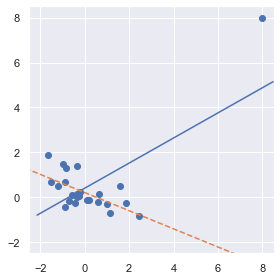

In [54]:
%matplotlib inline
from scipy.stats import linregress

np.random.seed(5)
x = np.random.normal(size=25)
y = -x / 5 + np.random.normal(size=25)
x[0] = 8
y[0] = 8

def abline(slope, intercept, ax):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x, y)
slope, intercept, _, _, _ = linregress(x, y)
ax.plot(*abline(slope, intercept, ax))
slope, intercept, _, _, _ = linregress(x[1:], y[1:])
ax.plot(*abline(slope, intercept, ax), '--')
ax.set_xlim(-2.5, 8.5)
ax.set_ylim(-2.5, 8.5)

plt.tight_layout()
plt.show()

In addition to standardized residuals, statisticians have developed several metrics to determine the influence of a single record on a regression. A common measure of leverage is the *hat-value*; values above $2(P + 1)/n$ indicate
a high-leverage data value.

Another metric is *Cook’s distance*, which defines influence as a combination of leverage and residual size. A rule of thumb is that an observation has high influence if Cook’s distance exceeds $4/ n − P − 1$ . An influence plot or bubble plot combines standardized residuals, the hat-value, and Cook’s distance in a single plot.

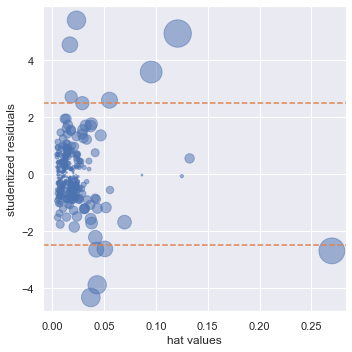

In [55]:
influence = OLSInfluence(result_98105)
fig, ax = plt.subplots(figsize=(5, 5))
ax.axhline(-2.5, linestyle='--', color='C1')
ax.axhline(2.5, linestyle='--', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal, 
           s=1000 * np.sqrt(influence.cooks_distance[0]),
           alpha=0.5)

ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')

plt.tight_layout()
plt.show()

There are apparently several data points that exhibit large influence in the regression. The hat values are plotted on the x-axis, the residuals are plotted on the y-axis, and the size of the points is related to the value of Cook’s distance.

In [56]:

mask = [dist < .08 for dist in influence.cooks_distance[0]]
house_infl = house_98105.loc[mask]

ols_infl = sm.OLS(house_infl[outcome], house_infl[predictors].assign(const=1))
result_infl = ols_infl.fit()

pd.DataFrame({
    'Original': result_98105.params,
    'Influential removed': result_infl.params,
})

,Original,Influential removed
SqFtTotLiving,209.602346,230.052569
SqFtLot,38.933315,33.141600
Bathrooms,2282.264145,-16131.879785
Bedrooms,-26320.268796,-22887.865318
BldgGrade,130000.099737,114870.559737
const,-772549.862447,-647137.096716


Compares the regression with the full data set and with highly influential data points removed (Cook’s distance > 0.08).
The regression coefficient for Bathrooms changes quite dramatically.


#### Heteroskedasticity, Non-Normality, and Correlated Errors

The distribution of the residuals is relevant mainly for the validity of formal statistical inference (hypothesis tests and p-values), which is of minimal importance to data scientists concerned mainly with predictive accuracy. Normally distributed errors are a sign that the model is complete; errors that are not normally distributed indicate the model may be missing something. For formal inference to be fully valid, the residuals are assumed to be normally distributed, have the same variance, and be independent. One area where this may be of concern to data scientists is the standard calculation of
confidence intervals for predicted values, which are based upon the assumptions about the residuals.

Heteroskedasticity is the lack of constant residual variance across the range of the predicted values. In other words, errors are greater for some portions of the range than for others. Visualizing the data is a convenient way to analyze residuals. 

The following code plots the absolute residuals versus the predicted values for the `lm_98105` regression fit

Text(0, 0.5, 'abs(residual)')

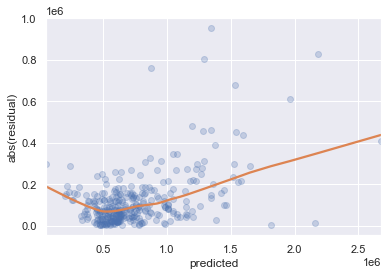

In [60]:
sns.regplot(x=result_98105.fittedvalues, y=np.abs(result_98105.resid), 
            scatter_kws={'alpha': 0.25},
            line_kws={'color': 'C1'},
            lowess=True)
plt.xlabel('predicted')
plt.ylabel('abs(residual)')

Evidently, the variance of the residuals tends to increase for higher-valued homes but is also large for lower-valued homes. This plot indicates that `lm_98105` has heteroskedastic errors.

Heteroskedasticity indicates that prediction errors differ for different ranges of the predicted value, and may suggest an incomplete model. For example, the heteroskedasticity in `lm_98105` may indicate that the regression has left something unaccounted for in highand low-range homes.


Below is a histogram of the standardized residuals for the `lm_98105` regression. The distribution has decidedly longer tails than the normal distribution and exhibits mild skewness toward larger residuals.

Text(17.200000000000003, 0.5, 'Frequency')

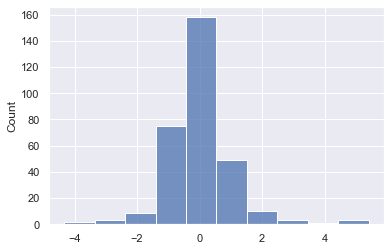

In [63]:
sns.histplot(influence.resid_studentized_internal, bins = 10)
ax.set_xlabel('std. residual')
ax.set_ylabel('Frequency')

#### Partial Residual Plots and Nonlinearity

Partial residual plots are a way to visualize how well the estimated fit explains the relationship between a predictor and the outcome. The basic idea of a partial residual plot is to isolate the relationship between a predictor variable and the response, taking into account all of the other predictor variables. A partial residual might be thought of as a “synthetic outcome” value, combining the prediction based on a single predictor with the actual residual from the full regression equation. A partial residual for predictor $X_i$ is the ordinary residual plus the regression term associated with $X_i$:

$$Partial\ residual = Residual + \hat{b_i}X_i$$

where $\hat{b_i}$ is the estimated regression coefficient.

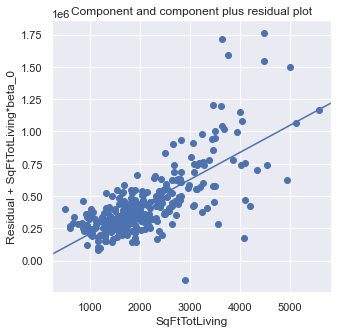

In [72]:
fig, ax = plt.subplots(figsize=(5, 5))
fig = sm.graphics.plot_ccpr(result_98105, 'SqFtTotLiving', ax=ax)


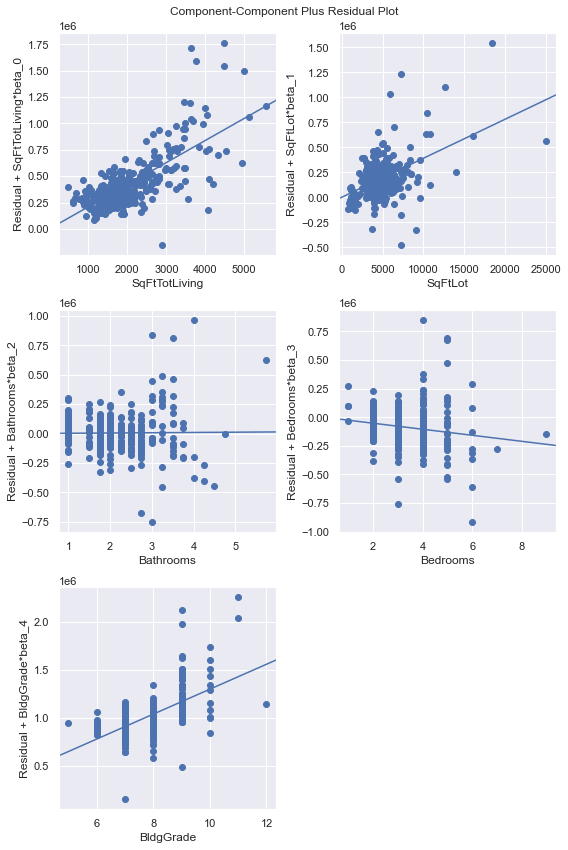

In [73]:
fig = plt.figure(figsize=(8, 12))
fig = sm.graphics.plot_ccpr_grid(result_98105, fig=fig)

Note - Textbook making reference to R plot in following section which is different from plot generated in Python. 

The resulting plot is shown in above. The partial residual is an estimate of the contribution that `SqFtTotLiving` adds to the sales price. The relationship between `SqFtTotLiving` and the sales price is evidently nonlinear (dashed line). The regression line (solid line) underestimates the sales price for homes less than 1,000 square feet and overestimates the price for homes between 2,000 and 3,000 square feet. There are too few data points above 4,000 square feet to draw conclusions for those homes.

This nonlinearity makes sense in this case: adding 500 feet in a small home makes a
much bigger difference than adding 500 feet in a large home. This suggests that,
instead of a simple linear term for `SqFtTotLiving`, a nonlinear term should be considered

#### Polynomial and Spline Regression

The relationship between the response and a predictor variable isn’t necessarily linear. The response to the dose of a drug is often nonlinear: doubling the dosage generally doesn’t lead to a doubled response. The demand for a product isn’t a linear function of marketing dollars spent; at some point, demand is likely to be saturated. There are many ways that regression can be extended to capture these nonlinear effects.

#### Key Terms for Nonlinear Regression

- Polynomial regression -  Adds polynomial terms (squares, cubes, etc.) to a regression.

- Spline regression -  Fitting a smooth curve with a series of polynomial segments.

- Knots - Values that separate spline segments.

- Generalized additive models - Spline models with automated selection of knots. Synonym - GAM

#### Polynomial

Polynomial regression involves including polynomial terms in a regression equation. For example, a quadratic regression between the response $Y$ and the predictor $X$ would take the form:

$$Y = b_0 + b_1X + b_2X^2 + e$$

For example, the following fits a quadratic polynomial for `SqFtTotLiving` with the King County housing data. In `statsmodels`, we add the squared term to the model definition using `I(SqFtTotLiving**2)`:


In [74]:
model_poly = smf.ols(formula='AdjSalePrice ~  SqFtTotLiving + np.power(SqFtTotLiving, 2) + ' + 
                'SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105)
result_poly = model_poly.fit()
print(result_poly.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.6
Date:                Fri, 18 Feb 2022   Prob (F-statistic):          9.95e-106
Time:                        18:51:12   Log-Likelihood:                -4217.9
No. Observations:                 313   AIC:                             8450.
Df Residuals:                     306   BIC:                             8476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

There are now two coefficients associated with `SqFtTotLiving`: one for the linear term and one for the quadratic term.

The partial residual plot (see “Partial Residual Plots and Nonlinearity”) indicates some curvature in the regression equation associated with `SqFtTotLiving`. The fitted line more closely matches the smooth (see “Splines” later) of the
partial residuals as compared to a linear fit.

The `statsmodels` implementation of a partial residual plot works only for linear term. Here is an implementation of a partial residual plot that, while inefficient, works for the polynomial regression.

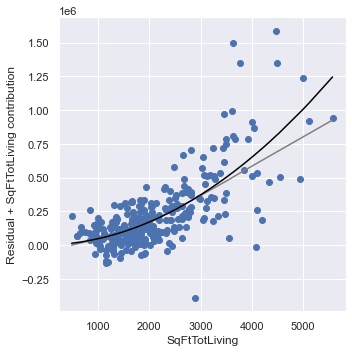

0.038791281682308366


In [75]:
def partialResidualPlot(model, df, outcome, feature, ax):
    y_pred = model.predict(df)
    copy_df = df.copy()
    for c in copy_df.columns:
        if c == feature:
            continue
        copy_df[c] = 0.0
    feature_prediction = model.predict(copy_df)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': df[outcome] - y_pred,
        'ypartial': feature_prediction - model.params[0],
    })
    results = results.sort_values(by=['feature'])
    smoothed = sm.nonparametric.lowess(results.ypartial, results.feature, frac=1/3)
    
    ax.scatter(results.feature, results.ypartial + results.residual)
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='gray')
    ax.plot(results.feature, results.ypartial, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'Residual + {feature} contribution')
    return ax

fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_poly, house_98105, 'AdjSalePrice', 'SqFtTotLiving', ax)

plt.tight_layout()
plt.show()
print(result_poly.params[2])

#### Splines

Polynomial regression captures only a certain amount of curvature in a nonlinear relationship. Adding in higher-order terms, such as a cubic quartic polynomial, often leads to undesirable “wiggliness” in the regression equation. An alternative, and often superior, approach to modeling nonlinear relationships is to use *splines*. Splines provide a way to smoothly interpolate between fixed points.

The technical definition of a spline is a series of piecewise continuous polynomials. They were first developed during World War II at the US Aberdeen Proving Grounds by I. J. Schoenberg, a Romanian mathematician. The polynomial pieces are smoothly
connected at a series of fixed points in a predictor variable, referred to as knots. Formulation of splines is much more complicated than polynomial regression; statistical software usually handles the details of fitting a spline.

The `statsmodels` formula interface supports the use of splines which two parameters need to be specified: the degree of the polynomial and the location of the knots. Here, we specify the b-spline using `df`, the degrees of freedom. This will create `df –degree = 6 – 3 = 3` internal knots.

Note - didn't understsand much of this section.

In [76]:
formula = ('AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + ' + 
           'SqFtLot + Bathrooms + Bedrooms + BldgGrade')
model_spline = smf.ols(formula=formula, data=house_98105)
result_spline = model_spline.fit()
print(result_spline.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     131.8
Date:                Fri, 18 Feb 2022   Prob (F-statistic):          7.10e-104
Time:                        19:12:00   Log-Likelihood:                -4211.4
No. Observations:                 313   AIC:                             8445.
Df Residuals:                     302   BIC:                             8486.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


<AxesSubplot:xlabel='SqFtTotLiving', ylabel='Residual + SqFtTotLiving contribution'>

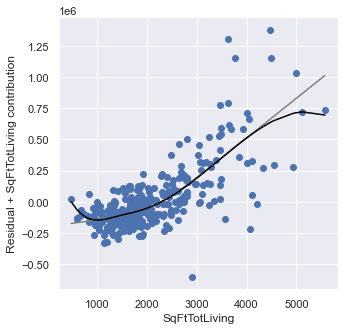

In [77]:
fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_spline, house_98105, 'AdjSalePrice', 'SqFtTotLiving', ax)

--discussion about above plot skipped--

#### Generalized Additive Models

Suppose you suspect a nonlinear relationship between the response and a predictor variable, either by a priori knowledge or by examining the regression diagnostics. Polynomial terms may not be flexible enough to capture the relationship, and spline
terms require specifying the knots. *Generalized additive models*, or GAM, are a flexible modeling technique that can be used to automatically fit a spline regression.

In Python, we can use the `pyGAM` package. It provides methods for regression and classification. Here, we use `LinearGAM` to create a regression model:

In [79]:
from pygam import LinearGAM, s, l
from pygam.datasets import wage

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'
X = house_98105[predictors].values
y = house_98105[outcome]

## model
gam = LinearGAM(s(0, n_splines=12) + l(1) + l(2) + l(3) + l(4))
gam.gridsearch(X, y)
print(gam.summary())

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      7.6772
Link Function:                     IdentityLink Log Likelihood:                                 -7833.1159
Number of Samples:                          313 AIC:                                            15683.5863
                                                AICc:                                             15684.14
                                                GCV:                                      30838885095.1718
                                                Scale:                                    29480381715.8332
                                                Pseudo R-Squared:                                   0.8117
Feature Function                  Lam

C:\Users\pcxyz\AppData\Local\Temp/ipykernel_1688/2695928348.py:13: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


#### $\S$ END OF CHAPTER 4 $\S$

### CHAPTER 5 - CLASSIFICATION



 Is an email an attempt at phishing? Is a customer likely to churn? Is the web user likely to click on an advertisement? These are all classification problems, a form of supervised learning in which we first train a model on data where the outcome is known and then apply the model to data where the outcome is not known. Classification is
perhaps the most important form of prediction: the goal is to predict whether a
record is a 1 or a 0 (phishing/not-phishing, click/don’t click), or in some cases, one of several categories (for example, Gmail’s filtering of your inbox into “primary,” “social,” “promotional,” or “forums”).

Often, we need more than a simple binary classification: we want to know the predicted probability that a case belongs to a class. Rather than having a model simply assign a binary classification, most algorithms can return a probability score (propensity) of belonging to the class of interest. In fact in Python’s scikit-learn, logistic regression, like most classification methods, provides two prediction methods: `predict` (which returns the class) and `predict_proba` (which returns probabilities for each class). A sliding cutoff can then be used to convert the propensity score to a decision.

#### More Than Two Categories?

The vast majority of problems involve a binary response. Some classification problems, however, involve a response with more than two possible outcomes. For example, at the anniversary of a customer’s subscription contract, there might be three outcomes: the customer leaves or “churns” (Y = 2), goes on a month-to-month contract (Y = 1), or signs a new long-term contract (Y = 0). The goal is to predict Y = j for j = 0, 1, or 2. Most of the classification methods in this chapter can be applied, either directly or with modest adaptations, to responses that have more than two outcomes. Even in the case of more than two outcomes, the problem can often be recast into a series of binary problems using conditional probabilities. For example, to predict the outcome of the contract, you can solve two binary prediction problems:

• Predict whether Y = 0 or Y > 0.

• Given that Y > 0, predict whether Y = 1 or Y = 2.

In this case, it makes sense to break up the problem into two cases: (1) whether the
customer churns; and (2) if they don’t churn, what type of contract they will choose.
From a model-fitting viewpoint, it is often advantageous to convert the multiclass
problem to a series of binary problems. This is particularly true when one category is
much more common than the other categories.

### Naive Bayes

The naive Bayes algorithm uses the probability of observing predictor values, given
an outcome, to estimate what is really of interest: the probability of observing outcome
$Y = i$, given a set of predictor values.

#### Key Terms for Naive Bayes

- Conditional probability - The probability of observing some event (say, $X = i$) given some other event (say, $Y = i$), written as $P (X_i|Y_i)$.
 
- Posterior probability - The probability of an outcome after the predictor information has been incorporated (in contrast to the *prior probability* of outcomes, not taking predictor information into account).



To understand naive Bayesian classification, we can start out by imagining complete
or exact Bayesian classification. For each record to be classified:
1. Find all the other records with the same predictor profile (i.e., where the predictor
values are the same).
2. Determine what classes those records belong to and which class is most prevalent
(i.e., probable).
3. Assign that class to the new record.
The preceding approach amounts to finding all the records in the sample that are
exactly like the new record to be classified in the sense that all the predictor values are
identical.

#### Why Exact Bayesian Classification Is Impractical

When the number of predictor variables exceeds a handful, many of the records to be
classified will be without exact matches. Consider a model to predict voting on the
basis of demographic variables. Even a sizable sample may not contain even a single
match for a new record who is a male Hispanic with high income from the US Midwest
who voted in the last election, did not vote in the prior election, has three
daughters and one son, and is divorced. And this is with just eight variables, a small
number for most classification problems. The addition of just a single new variable
with five equally frequent categories reduces the probability of a match by a factor
of 5.

#### The Naive Solution

In the naive Bayes solution, we no longer restrict the probability calculation to those records that match the record to be classified. Instead, we use the entire data set. The naive Bayes modification is as follows:

1. For a binary response $Y = i (i = 0\ or\ 1)$, estimate the individual conditional probabilities for each predictor $P(X_j| Y = i)$ ; these are the probabilities that the predictor alue is in the record when we observe Y = i. This probability is estimated by the proportion of Xj values among the Y = i records in the training set.

2. Multiply these probabilities by each other, and then by the proportion of records belonging to $Y = i$.

3. Repeat steps 1 and 2 for all the classes.

4. Estimate a probability for outcome $i$ by taking the value calculated in step 2 for class $i$ and dividing it by the sum of such values for all classes.

5. Assign the record to the class with the highest probability for this set of predictor values.

This naive Bayes algorithm can also be stated as an equation for the probability of observing outcome $Y = i$, given a set of predictor values $X_1, \dots,X_p$:

$$P(Y = i|X_1, X_2, \dots, X_p)$$

Here is the full formula for calculating class probabilities using exact Bayes classification:

$$P(Y = i|X_1, X_2, \dots, X_p) =
\frac{P(Y = i)P(X_1,\dots, X_p |Y = i)}
{P(Y = 0)P(X_1, \dots, X_p |Y = 0) + P(Y = 1)P(X_1, \dots, X_p |Y = 1)}$$

Under the naive Bayes assumption of conditional independence, this equation changes into:


$$P(Y = i|X_1, X_2, \dots, X_p) =
\frac{P(Y = i)P(X_1|Y=i)\dots P(X_p |Y = i)}
{P(Y = 0)P(X_1|Y=0) \dots P(X_p |Y = 0) + P(Y = 1)P(X_1|Y=1) \dots P(X_p |Y = 1)}$$

Why is this formula called “naive”? We have made a simplifying assumption that the exact conditional probability of a vector of predictor values, given observing an outcome, is sufficiently well estimated by the product of the individual conditional
probabilities $P(X_j| Y = i)$ . In other words, in estimating $P(X_j| Y = i)$ instead of $P(X_1, X_2,\dots X_p|Y = i)$ , we are assuming $X_j$ is independent of all the other predictor variables $X_k$ for $k ≠ j$.

In Python we can use `sklearn.naive_bayes.MultinomialNB` from scikit-learn to estimate naive Bayes model. We need to convert the categorical features to dummy variables before we fit the model:

In [23]:
from sklearn.naive_bayes import MultinomialNB

loan_data = pd.read_csv('data/data/loan_data.csv.gz')

# convert to categorical
loan_data.outcome = loan_data.outcome.astype('category')
loan_data.outcome.cat.reorder_categories(['paid off', 'default'])
loan_data.purpose_ = loan_data.purpose_.astype('category')
loan_data.home_ = loan_data.home_.astype('category')
loan_data.emp_len_ = loan_data.emp_len_.astype('category')

predictors = ['purpose_', 'home_', 'emp_len_']
outcome = 'outcome'
X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='')
y = loan_data[outcome]

naive_model = MultinomialNB(alpha=0.01, fit_prior=True)
naive_model = MultinomialNB(alpha=0, fit_prior=False)
naive_model.fit(X, y)

new_loan = X.loc[146:146, :]
print('predicted class: ', naive_model.predict(new_loan)[0])

probabilities = pd.DataFrame(naive_model.predict_proba(new_loan),
                             columns=naive_model.classes_)
print('predicted probabilities',)
print(probabilities)

predicted class:  default
predicted probabilities
    default  paid off
0  0.653699  0.346301


C:\Users\pcxyz\miniconda3\envs\data\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


It is possible to derive the conditional probabilities from the fitted model using the
property `feature_log_prob_`.

In [24]:
naive_model.feature_log_prob_

array([[-2.98568194, -1.65075748, -3.91515967, -4.38811751, -5.34362896,
        -3.25614294, -4.18336693, -1.93946163, -3.5841808 , -1.82144002,
        -4.1501728 , -1.14705185],
       [-2.77207425, -1.69253125, -3.73665562, -4.02495479, -5.34980182,
        -3.4021241 , -4.96203629, -1.81302406, -3.61319949, -1.94345775,
        -4.57067579, -1.13015754]])

The model can be used to predict the outcome of a new loan. We use the last value of
the data set for testing:

In [25]:
new_loan = X.loc[146:146, :]

print('predicted class: ', naive_model.predict(new_loan)[0])
probabilities = pd.DataFrame(naive_model.predict_proba(new_loan),
columns=loan_data[outcome].cat.categories)
print('predicted probabilities', probabilities)

predicted class:  default
predicted probabilities     default  paid off
0  0.653699  0.346301


The prediction also returns a posterior estimate of the probability of default. The naive Bayesian classifier is known to produce biased estimates. However, where the goal is to rank records according to the probability that $Y = 1$, unbiased estimates of probability are not needed, and naive Bayes produces good results.

#### Numeric Predictor Variables

The Bayesian classifier works only with categorical predictors (e.g., with spam classification, where the presence or absence of words, phrases, characters, and so on lies at the heart of the predictive task). To apply naive Bayes to numerical predictors, one of two approaches must be taken:

• Bin and convert the numerical predictors to categorical predictors and apply the algorithm of the previous section.

• Use a probability model—for example, the normal distribution (see “Normal Distribution” section)—to estimate the conditional probability $P(X_j| Y = i)$ .

### Discriminant Analysis

While discriminant analysis encompasses several techniques, the most commonly used is linear discriminant analysis, or LDA. The original method proposed by Fisher was actually slightly different from LDA, but the mechanics are essentially the same.
LDA is now less widely used with the advent of more sophisticated techniques, such as tree models and logistic regression.

However, you may still encounter LDA in some applications, and it has links to other more widely used methods (such as principal components analysis).

##### Key Terms for Discriminant Analysis

- Covariance- A measure of the extent to which one variable varies in concert with another (i.e., similar magnitude and direction).

- Discriminant function - The function that, when applied to the predictor variables, maximizes the separation of the classes.

- Discriminant weights - The scores that result from the application of the discriminant function and are used to estimate probabilities of belonging to one class or another.

#### Covariance Matrix

To understand discriminant analysis, it is first necessary to introduce the concept of covariance between two or more variables. The covariance measures the relationship between two variables $x$ and $z$. Denote the mean for each variable by $\bar{x}$ and $\bar{z}$. The covariance $s_{x, z}$ between $x$ and $z$ is given by:

$$s_{x, z} = \frac{\sum_{i=1}^n(x_i-\bar{x})(z_i -\bar{z})}{n-1}$$

where $n$ is the number of records.

As with the correlation coefficient, positive values indicate a positive relationship and negative values indicate a negative relationship. Correlation, however, is constrained to be between $–1$ and $1$, whereas covariance scale depends on the scale of the variables $x$ and $z$. The covariance matrix $Σ$ for $x$ and $z$ consists of the individual variable variances, $s_x^2$ and $s^2_z$, on the diagonal (where row and column are the same variable) and the covariances between variable pairs on the off-diagonals:

$$\hat{Σ} = \begin{bmatrix}
s_x^2&s_{x,z}\\
s_{z,x}&s_z^2\end{bmatrix}$$



Fisher’s Linear Discriminant
For simplicity, let’s focus on a classification problem in which we want to predict a binary outcome y using just two continuous numeric variables $x$, $z$ . Technically, discriminant analysis assumes the predictor variables are normally distributed continuous variables, but, in practice, the method works well even for nonextreme departures from normality, and for binary predictors. Fisher’s linear discriminant distinguishes variation between groups, on the one hand, from variation within groups on the other. Specifically, seeking to divide the records into two groups, linear discriminant analysis (LDA) focuses on maximizing the “between” sum of squares $SS_{between}$ (measuring the variation between the two groups) relative to the “within” sum of squares $SS_{within}$ (measuring the within-group variation). In this case, the two groups correspond
to the records $x_0$, $z_0$ for which $y = 0$ and the records $x_1$, $z_1$ for which $y = 1$.

The method finds the linear combination $w_xx + w_zz$ that maximizes that sum of squares ratio:

$$\frac{SS_{between}}{SS_{within}}$$

The between sum of squares is the squared distance between the two group means, and the within sum of squares is the spread around the means within each group, weighted by the covariance matrix. Intuitively, by maximizing the between sum of squares and minimizing the within sum of squares, this method yields the greatest separation between the two groups.

In Python, we can use `LinearDiscriminantAnalysis` from `sklearn.discriminant_analysis`. The `scalings_ property` gives the estimated weights:

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

loan3000 = pd.read_csv('data/data/loan3000.csv')
loan3000.outcome = loan3000.outcome.astype('category')

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

loan_lda = LinearDiscriminantAnalysis()
loan_lda.fit(X, y)
print(pd.DataFrame(loan_lda.scalings_, index=X.columns))

                          0
borrower_score     7.175839
payment_inc_ratio -0.099676


In [27]:
pred = pd.DataFrame(loan_lda.predict_proba(loan3000[predictors]),
                    columns=loan_lda.classes_)
print(pred.head())

    default  paid off
0  0.553544  0.446456
1  0.558953  0.441047
2  0.272696  0.727304
3  0.506254  0.493746
4  0.609952  0.390048


A plot of the predictions helps illustrate how LDA works. Using the output from the
predict function, a plot of the estimated probability of default is produced as follows:

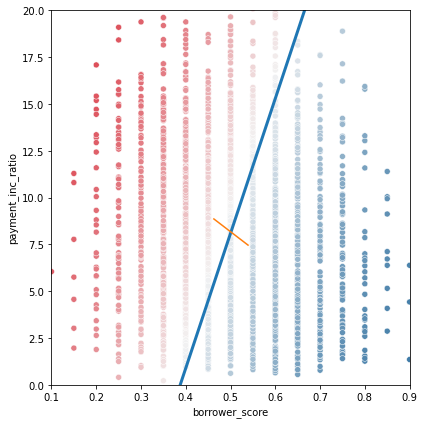

In [28]:
# Use scalings and center of means to determine decision boundary
center = np.mean(loan_lda.means_, axis=0)
slope = - loan_lda.scalings_[0] / loan_lda.scalings_[1]
intercept = center[1] - center[0] * slope

# payment_inc_ratio for borrower_score of 0 and 20
x_0 = (0 - intercept) / slope
x_20 = (20 - intercept) / slope

lda_df = pd.concat([loan3000, pred['default']], axis=1)
lda_df.head()

fig, ax = plt.subplots(figsize=(6, 6))
g = sns.scatterplot(x='borrower_score', y='payment_inc_ratio',
                    hue='default', data=lda_df, 
                    palette=sns.diverging_palette(240, 10, n=9, as_cmap=True),
                    ax=ax, legend=False)

ax.set_ylim(0, 20)
ax.set_xlim(0.10, 0.9)
ax.plot((x_0, x_20), (0, 20), linewidth=3)
ax.plot(*loan_lda.means_.transpose())

plt.tight_layout()
plt.show()

Using the discriminant function weights, LDA splits the predictor space into two
regions, as shown by the solid line. The predictions farther away from the line in both
directions have a higher level of confidence (i.e., a probability further away from 0.5).

### Logistic Regression

Logistic regression is analogous to multiple linear regression, except the outcome is binary. Various transformations are employed to convert the problem to one in which a linear model can be fit. Like discriminant analysis, and unlike KNearest
Neighbor and naive Bayes, logistic regression is a structured model approach rather than a data-centric approach. Due to its fast computational speed and its output of a model that lends itself to rapid scoring of new data, it is a popular method.

##### Key Terms for Logistic Regression

- Logit -  The function that maps class membership probability to a range from $±∞$ (instead of 0 to 1). Synonym - Log odds (see below)

- Odds - The ratio of “success” (1) to “not success” (0).

- Log odds - The response in the transformed model (now linear), which gets mapped back to a probability.

#### Logistic Response Function and Logit

The key ingredients for logistic regression are the *logistic response function* and the *logit*, in which we map a probability (which is on a 0–1 scale) to a more expansive scale suitable for linear modeling.

The first step is to think of the outcome variable not as a binary label but as the probability $p$ that the label is a “1.” Naively, we might be tempted to model $p$ as a linear function of the predictor variables:

$$p = β_0 + β_1x_1 + β_2x_2 + \dots + β_qx_q$$

However, fitting this model does not ensure that $p$ will end up between 0 and 1, as a probability must.

Instead, we model $p$ by applying a logistic response or inverse logit function to the predictors:

$$p = \frac{1}{1+e^{-(β_0 + β_1x_1 + β_2x_2 + \dots + β_qx_q)}}$$

This transform ensures that the $p$ stays between $0$ and $1$.

To get the exponential expression out of the denominator, we consider odds instead of probabilities. Odds, familiar to bettors everywhere, are the ratio of “successes” (1) to “nonsuccesses” (0). In terms of probabilities, odds are the probability of an event divided by the probability that the event will not occur. For example, if the probability
that a horse will win is $0.5$, the probability of “won’t win” is $(1 – 0.5) = 0.5$, and the
odds are $1.0$:

$$Odds(Y = 1) = \frac{p}{1 − p}$$

We can obtain the probability from the odds using the inverse odds function:

$$p = \frac{Odds}{1+Odds}$$

We combine this with the logistic response function, shown earlier, to get:

$$Odds(Y = 1) = e^{β_0 + β_1x_1 + β_2x_2 +\dots + β_qx_q}$$

Finally, taking the logarithm of both sides, we get an expression that involves a linear function of the predictors:

$$log (Odds(Y = 1)) = β_0 + β_1x_1 + β_2x_2 +\dots + β_qx_q$$

The *log-odds* function, also known as the logit function, maps the probability $p$ from $0$, $1$ to any value $− ∞$, $+ ∞$ —see plot below. The transformation circle is complete; we have used a linear model to predict a probability, which we can in turn map to a class label by applying a cutoff rule—any record with a probability greater than the cutoff is classified as a $1$.

Text(0, 0.5, 'logit(p)')

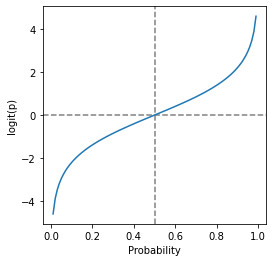

In [29]:
p = np.arange(0.01, 1, 0.01)
df = pd.DataFrame({
    'p': p,
    'logit': np.log(p / (1 - p)),
    'odds': p / (1 - p),
})

fig, ax = plt.subplots(figsize=(4, 4))
ax.axhline(0, color='grey', linestyle='--')
ax.axvline(0.5, color='grey', linestyle='--')
ax.plot(df['p'], df['logit'])
ax.set_xlabel('Probability')
ax.set_ylabel('logit(p)')


#### Logistic Regression and the GLM

The response in the logistic regression formula is the log odds of a binary outcome of $1$. We observe only the binary outcome, not the log odds, so special statistical methods are needed to fit the equation. Logistic regression is a special instance of a generalized linear model (GLM) developed to extend linear regression to other settings.

In Python, we use the scikit-learn class `LogisticRegression` from `sklearn.linear_model`. The arguments `penalty` and `C` are used to prevent overfitting by L1 or L2 regularization. Regularization is switched on by default. In order to fit without regularization, we set `C` to a very large value. The `solver` argument selects the used minimizer;
the method `liblinear` is the default:

In [30]:
from sklearn.linear_model import LogisticRegression

predictors = ['payment_inc_ratio', 'purpose_', 'home_', 'emp_len_', 
              'borrower_score']
outcome = 'outcome'
X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='', 
                   drop_first=True)
y = loan_data[outcome] # .cat.categories

logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)

print('intercept ', logit_reg.intercept_[0])
print('classes', logit_reg.classes_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
             index=X.columns)

intercept  -1.638088598993065
classes ['default' 'paid off']


,coeff
payment_inc_ratio,-0.079728
borrower_score,4.611037
debt_consolidation,-0.249342
home_improvement,-0.407614
major_purchase,-0.229376
medical,-0.510087
other,-0.620534
small_business,-1.215662
OWN,-0.048453
RENT,-0.157355


`predict` method returns the class label and `predict_proba` returns the probabilities
in the order available from the attribute `logit_reg.classes_`.

In [95]:
logit_reg.classes_

array(['default', 'paid off'], dtype=object)

#### Generalized Linear Models

Generalized linear models (GLMs) are characterized by two main components:

• A probability distribution or family (binomial in the case of logistic regression)
• A link function—i.e., a transformation function that maps the response to the predictors (logit in the case of logistic regression)

Logistic regression is by far the most common form of GLM. A data scientist will
encounter other types of GLMs. Sometimes a log link function is used instead of the
logit; in practice, use of a log link is unlikely to lead to very different results for most
applications. The Poisson distribution is commonly used to model count data (e.g.,
the number of times a user visits a web page in a certain amount of time). Other families
include negative binomial and gamma, often used to model elapsed time (e.g.,
time to failure). In contrast to logistic regression, application of GLMs with these
models is more nuanced and involves greater care. These are best avoided unless you
are familiar with and understand the utility and pitfalls of these methods.

#### Predicted Values from Logistic Regression

The predicted value from logistic regression is in terms of the log odds: $\hat{Y} =\text{log(Odds (Y = 1))}$ . The predicted probability is given by the logistic response function:

$$\hat{p} = \frac{1}{1+e^{-\hat{Y}}}$$

In Python, we can convert the probabilities into a data frame and use the `describe` method to get these characteristics of the distribution:

In [96]:
pred = pd.DataFrame(logit_reg.predict_log_proba(X),
columns=loan_data[outcome].cat.categories)
pred.describe()

,default,paid off
count,45342.000000,45342.000000
mean,-0.757850,-0.760423
std,0.378032,0.390419
min,-2.768873,-3.538865
25%,-0.985728,-0.977164
50%,-0.697366,-0.688946
75%,-0.472209,-0.467076
max,-0.029476,-0.064787


The probabilities are directly available using the `predict_proba` methods in scikitlearn:

In [97]:
pred = pd.DataFrame(logit_reg.predict_proba(X),
columns=loan_data[outcome].cat.categories)
pred.describe()

,default,paid off
count,45342.000000,45342.000000
mean,0.500001,0.499999
std,0.167336,0.167336
min,0.062733,0.029046
25%,0.373167,0.376377
50%,0.497895,0.502105
75%,0.623623,0.626833
max,0.970954,0.937267


These are on a scale from 0 to 1 and don’t yet declare whether the predicted value is
default or paid off. We could declare any value greater than 0.5 as default. In practice,
a lower cutoff is often appropriate if the goal is to identify members of a rare class.

#### Interpreting the Coefficients and Odds Ratios

One advantage of logistic regression is that it produces a model that can be scored to
new data rapidly, without recomputation. Another is the relative ease of interpretation
of the model, as compared with other classification methods. The key conceptual
idea is understanding an odds ratio. The odds ratio is easiest to understand for a
binary factor variable $X$:


$$\text{odds ratio} = \frac{\text{Odds}(Y=1|X = 1)}{\text{Odds}(Y=1|X = 0)}$$

This is interpreted as the odds that $Y = 1$ when $X = 1$ versus the odds that $Y = 1$ when
$X = 0$. If the odds ratio is $2$, then the odds that $Y = 1$ are two times higher when $X = 1$
versus when $X = 0$.
Why bother with an odds ratio rather than probabilities? We work with odds because
the coefficient $β_j$ in the logistic regression is the log of the odds ratio for $X_j$.

An example will make this more explicit. For the model fit in “Logistic Regression and the GLM” section, the regression coefficient for purpose_small_business is $1.21526$. This means that a loan to a small business compared to a loan to pay off credit card debt reduces the odds of defaulting versus being paid off by $exp(1.21526) ≈ 3.4$. Clearly, loans for the purpose of creating or expanding a small business are considerably riskier than other types of loans.



Next plot shows the relationship between the odds ratio and the log-odds ratio for
odds ratios greater than 1. Because the coefficients are on the log scale, an increase of
1 in the coefficient results in an increase of $exp(1) ≈ 2.72$ in the odds ratio.

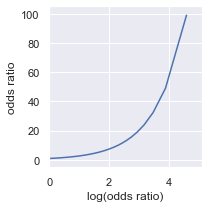

In [98]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(df['logit'], df['odds'])
ax.set_xlabel('log(odds ratio)')
ax.set_ylabel('odds ratio')
ax.set_xlim(0, 5.1)
ax.set_ylim(-5, 105)

plt.tight_layout()
plt.show()

#### Linear and Logistic Regression: Similarities and Differences

Linear regression is fit using least squares, and the quality of the fit is evaluated using
RMSE and R-squared statistics. In logistic regression (unlike in linear regression),
there is no closed-form solution, and the model must be fit using maximum likelihood
estimation (MLE). Maximum likelihood estimation is a process that tries to find the
model that is most likely to have produced the data we see. In the logistic regression
equation, the response is not 0 or 1 but rather an estimate of the log odds that the
response is 1. The MLE finds the solution such that the estimated log odds best
describes the observed outcome. The mechanics of the algorithm involve a quasi-
Newton optimization that iterates between a scoring step (Fisher’s scoring), based on
the current parameters, and an update to the parameters to improve the fit.

#### Assessing the Model

Like other classification methods, logistic regression is assessed by how accurately the
model classifies new data (see “Evaluating Classification Models” later). As with linear regression, some additional standard statistical tools are available to examine and improve the model.

The package `statsmodels` has an implementation for generalized linear model (GLM)
that provides similarly detailed information:

In [99]:
import statsmodels.api as sm
# use GLM (general linear model) with the binomial family to 
# fit a logistic regression
y_numbers = [1 if yi == 'default' else 0 for yi in y]
logit_reg_sm = sm.GLM(y_numbers, X.assign(const=1), 
                      family=sm.families.Binomial())
logit_result = logit_reg_sm.fit()
print(logit_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                45342
Model:                            GLM   Df Residuals:                    45330
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28757.
Date:                Fri, 25 Feb 2022   Deviance:                       57515.
Time:                        22:25:18   Pearson chi2:                 4.54e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
payment_inc_ratio      0.0797      0

Interpretation of the p-value comes with the same caveat as in regression and should be viewed more as a relative indicator of variable importance (see “Assessing the Model” section) than as a formal measure of statistical significance. A logistic
regression model, which has a binary response, does not have an associated RMSE or R-squared. Instead, a logistic regression model is typically evaluated using more general metrics for classification; see “Evaluating Classification Models” section.

Many other concepts for linear regression carry over to the logistic regression setting (and other GLMs). For example, you can use stepwise regression, fit interaction terms, or include spline terms. The same concerns regarding confounding and correlated variables apply to logistic regression.

The formula interface of statsmodels also supports these extensions in Python:

In [100]:
import statsmodels.formula.api as smf
formula = ('outcome ~ bs(payment_inc_ratio, df=8) + purpose_ + ' +    #need to understand this code
           'home_ + emp_len_ + bs(borrower_score, df=3)')
model = smf.glm(formula=formula, data=loan_data, family=sm.families.Binomial())
results = model.fit()
print(results.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['outcome[default]', 'outcome[paid off]']   No. Observations:                45342
Model:                                                   GLM   Df Residuals:                    45321
Model Family:                                       Binomial   Df Model:                           20
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -28731.
Date:                                       Fri, 25 Feb 2022   Deviance:                       57462.
Time:                                               22:29:43   Pearson chi2:                 4.54e+04
No. Iterations:                                            6                                         
Covariance Type:                                   nonrobust                      

#### Analysis of residuals

One area where logistic regression differs from linear regression is in the analysis of the residuals. As in linear regression (see plot below), it is straightforward to compute partial residuals:

(-2.5, 2.5)

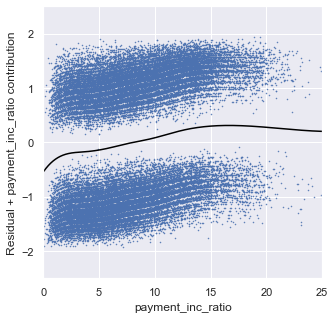

In [102]:
from statsmodels.genmod.generalized_linear_model import GLMResults
def partialResidualPlot(model, df, outcome, feature, fig, ax):
    y_actual = [0 if s == 'default' else 1 for s in df[outcome]]
    y_pred = model.predict(df)
    org_params = model.params.copy()
    zero_params = model.params.copy()
    # set model parametes of other features to 0
    for i, name in enumerate(zero_params.index):
        if feature in name:
            continue
        zero_params[i] = 0.0
    model.initialize(model.model, zero_params)
    feature_prediction = model.predict(df)
    ypartial = -np.log(1/feature_prediction - 1)
    ypartial = ypartial - np.mean(ypartial)
    model.initialize(model.model, org_params)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': -2 * (y_actual - y_pred),
        'ypartial': ypartial/ 2,
    })
    results = results.sort_values(by=['feature'])

    ax.scatter(results.feature, results.residual, marker=".", s=72./fig.dpi)
    ax.plot(results.feature, results.ypartial, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'Residual + {feature} contribution')
    return ax

fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(results, loan_data, 'outcome', 'payment_inc_ratio', fig, ax)
ax.set_xlim(0, 25)
ax.set_ylim(-2.5, 2.5)


#### Evaluating Classification Models

Fundamentally, the assessment process attempts to learn which model produces the most accurate and useful predictions.

##### Key Terms for Evaluating Classification Models

- Accuracy - The percent (or proportion) of cases classified correctly.

- Confusion matrix - A tabular display (2×2 in the binary case) of the record counts by their predicted and actual classification status.

- Sensitivity-  The percent (or proportion) of all 1s that are correctly classified as 1s. Synonym - Recall

- Specificity - The percent (or proportion) of all 0s that are correctly classified as 0s.

- Precision - The percent (proportion) of predicted 1s that are actually 1s.

- ROC curve - A plot of sensitivity versus specificity.

- Lift - A measure of how effective the model is at identifying (comparatively rare) 1s at different probability cutoffs.

A simple way to measure classification performance is to count the proportion of predictions that are correct, i.e., measure the $accuracy$. Accuracy is simply a measure of total error:

$$\text{accuracy} = \frac{\sum{TP}+\sum{TN}}{\text{SampleSize}}$$

#### Confusion Matrix

At the heart of classification metrics is the confusion matrix. The confusion matrix is a
table showing the number of correct and incorrect predictions categorized by type of
response. Several packages are available in R and Python to compute a confusion
matrix, but in the binary case, it is simple to compute one by hand.

In [103]:
pred = logit_reg.predict(X)
pred_y = logit_reg.predict(X) == 'default'
true_y = y == 'default'
true_pos = true_y & pred_y
true_neg = ~true_y & ~pred_y
false_pos = ~true_y & pred_y
false_neg = true_y & ~pred_y

conf_mat = pd.DataFrame([[np.sum(true_pos), np.sum(false_neg)],
[np.sum(false_pos), np.sum(true_neg)]],
index=['Y = default', 'Y = paid off'],
columns=['Yhat = default', 'Yhat = paid off'])
conf_mat

,Yhat = default,Yhat = paid off
Y = default,14336,8335
Y = paid off,8148,14523


The predicted outcomes are columns and the true outcomes are the rows. The diagonal
elements of the matrix show the number of correct predictions, and the offdiagonal
elements show the number of incorrect predictions. For example, 14,295
defaulted loans were correctly predicted as a default, but 8,376 defaulted loans were
incorrectly predicted as paid off.

In [105]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

print(confusion_matrix(y, logit_reg.predict(X)))

[[14336  8335]
 [ 8148 14523]]


#### The Rare Class Problem

In many cases, there is an imbalance in the classes to be predicted, with one class
much more prevalent than the other—for example, legitimate insurance claims versus
fraudulent ones, or browsers versus purchasers at a website. The rare class (e.g., the
fraudulent claims) is usually the class of more interest and is typically designated 1, in
contrast to the more prevalent 0s. In the typical scenario, the 1s are the more important
case, in the sense that misclassifying them as 0s is costlier than misclassifying 0s
as 1s. For example, correctly identifying a fraudulent insurance claim may save thousands
of dollars. On the other hand, correctly identifying a nonfraudulent claim
merely saves you the cost and effort of going through the claim by hand with a more
careful review (which is what you would do if the claim were tagged as “fraudulent”).

In such cases, unless the classes are easily separable, the most accurate classification
model may be one that simply classifies everything as a 0. For example, if only 0.1% of
the browsers at a web store end up purchasing, a model that predicts that each
browser will leave without purchasing will be 99.9% accurate. However, it will be useless.
Instead, we would be happy with a model that is less accurate overall but is good
at picking out the purchasers, even if it misclassifies some nonpurchasers along the
way.

#### Precision, Recall, and Specificity

Metrics other than pure accuracy—metrics that are more nuanced—are commonly used in evaluating classification models. Several of these have a long history in statistics—especially biostatistics, where they are used to describe the expected performance of diagnostic tests. The *precision* measures the accuracy of a predicted positive outcome:

$$\text{precision} = \frac{\sum{TP}}{\sum{TP}+\sum{FP}}$$

The recall, also known as *sensitivity*, measures the strength of the model to predict a positive outcome—the proportion of the 1s that it correctly identifies. The term *sensitivity* is used a lot in biostatistics and medical diagnostics, whereas *recall* is used more in the machine learning community. The definition of recall is:

$$\text{recall} = \frac{\sum{TP}}{\sum{TP}+\sum{FN}}$$

Another metric used is *specificity*, which measures a model’s ability to predict a negative
outcome:

$$\text{specificity} = \frac{\sum{TN}}{\sum{TN}+\sum{FP}}$$

In [106]:
conf_mat = confusion_matrix(y, logit_reg.predict(X))
print('Precision', conf_mat[0, 0] / sum(conf_mat[:, 0]))
print('Recall', conf_mat[0, 0] / sum(conf_mat[0, :]))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))

Precision 0.6376089663760897
Recall 0.6323496978518812
Specificity 0.6405981209474659


scikit-learn has a custom method `precision_recall_fscore_support` that calculates
precision and recall/specificity all at once.

In [107]:
precision_recall_fscore_support(y, logit_reg.predict(X), 
                                labels=['default', 'paid off'])

(array([0.63760897, 0.63535742]),
 array([0.6323497 , 0.64059812]),
 array([0.63496844, 0.63796701]),
 array([22671, 22671], dtype=int64))

#### ROC Curve

You can see that there is a trade-off between recall and specificity. Capturing more 1s
generally means misclassifying more 0s as 1s. The ideal classifier would do an excellent job of classifying the 1s, without misclassifying more 0s as 1s.

The metric that captures this trade-off is the “Receiver Operating Characteristics” curve, usually referred to as the ROC curve. The ROC curve plots recall (sensitivity) on the y-axis against specificity on the x-axis. The ROC curve shows the trade-off between recall and specificity as you change the cutoff to determine how to classify a record. Sensitivity (recall) is plotted on the y-axis, and you may encounter two forms in which the x-axis is labeled:

-  Specificity plotted on the x-axis, with 1 on the left and 0 on the right


-  1-Specificity plotted on the x-axis, with 0 on the left and 1 on the right

The curve looks identical whichever way it is done. The process to compute the ROC
curve is:

1. Sort the records by the predicted probability of being a 1, starting with the most probable and ending with the least probable.


2. Compute the cumulative specificity and recall based on the sorted records.

In Python, we can use the scikit-learn function `sklearn.metrics.roc_curve` to calculate the required information for the ROC curve.

Text(0, 0.5, 'recall')

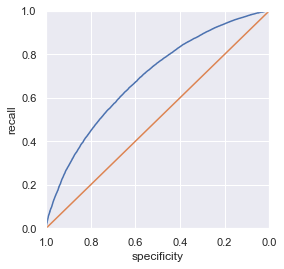

In [110]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, logit_reg.predict_proba(X)[:, 0], 
                                 pos_label='default')
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')



The result is shown in plot above. The red diagonal line corresponds to a classifier no better than random chance. An extremely effective classifier (or, in medical situations, an extremely effective diagnostic test) will have an ROC that hugs the upperleft corner—it will correctly identify lots of 1s without misclassifying lots of 0s as 1s. For this model, if we want a classifier with a specificity of at least 50%, then the recall
is about 75%.

#### AUC

The ROC curve is a valuable graphical tool, but by itself doesn’t constitute a single measure for the performance of a classifier. The ROC curve can be used, however, to produce the area underneath the curve (AUC) metric. AUC is simply the total area under the ROC curve. The larger the value of AUC, the more effective the classifier. An AUC of 1 indicates a perfect classifier: it gets all the 1s correctly classified, and it doesn’t misclassify any 0s as 1s.

A completely ineffective classifier—the diagonal line—will have an AUC of 0.5.

In Python, we can use scikit-learn’s function `sklearn.metrics.roc_auc_score`. You will need to provide the expected
value as 0 or 1:

In [111]:
from sklearn.metrics import roc_auc_score

print(np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)))
print(roc_auc_score([1 if yi == 'default' else 0 for yi in y], logit_reg.predict_proba(X)[:, 0]))

0.6917107933430462
0.691710871167958


The model has an AUC of about 0.69, corresponding to a relatively weak classifier.

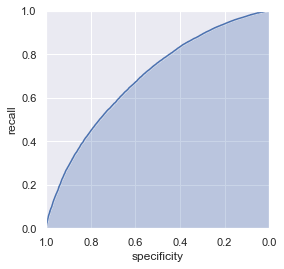

In [113]:
fpr, tpr, thresholds = roc_curve(y, logit_reg.predict_proba(X)[:,0], 
                                 pos_label='default')
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
# ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


#### Lift

Using the AUC as a metric to evaluate a model is an improvement over simple accuracy,
as it can assess how well a classifier handles the trade-off between overall accuracy
and the need to identify the more important 1s. But it does not completely
address the rare-case problem, where you need to lower the model’s probability cutoff
below 0.5 to avoid having all records classified as 0. In such cases, for a record to be
classified as a 1, it might be sufficient to have a probability of 0.4, 0.3, or lower. In
effect, we end up overidentifying 1s, reflecting their greater importance.

Changing this cutoff will improve your chances of catching the 1s (at the cost of misclassifying
more 0s as 1s). But what is the optimum cutoff?

The concept of lift lets you defer answering that question. Instead, you consider the
records in order of their predicted probability of being 1s. Say, of the top 10% classified
as 1s, how much better did the algorithm do, compared to the benchmark of simply
picking blindly? If you can get 0.3% response in this top decile instead of the 0.1%
you get overall by picking randomly, the algorithm is said to have a lift (also called
gains) of 3 in the top decile. A lift chart (gains chart) quantifies this over the range of
the data. It can be produced decile by decile, or continuously over the range of the
data.


### Strategies for Imbalanced Data

The previous section dealt with evaluation of classification models using metrics that go beyond simple accuracy and are suitable for imbalanced data—data in which the outcome of interest (purchase on a website, insurance fraud, etc.) is rare. In this section, we look at additional strategies that can improve predictive modeling performance with imbalanced data.

#### Key Terms for Imbalanced Data

- Undersample -  Use fewer of the prevalent class records in the classification model. Synonym -  Downsample

- Oversample -  Use more of the rare class records in the classification model, bootstrapping if necessary. Synonym -  Upsample

- Up weight or down weight -  Attach more (or less) weight to the rare (or prevalent) class in the model.

- Data generation -  Like bootstrapping, except each new bootstrapped record is slightly different from its source.

- z-score -  The value that results after standardization.

- K - The number of neighbors considered in the nearest neighbor calculation

#### Undersampling

If you have enough data, as is the case with the loan data, one solution is to undersample (or downsample) the prevalent class, so the data to be modeled is more balanced between 0s and 1s. The basic idea in undersampling is that the data for the dominant class has many redundant records. Dealing with a smaller, more balanced data set yields benefits in model performance, and it makes it easier to prepare the data and to explore and pilot models.

How much data is enough? It depends on the application, but in general, having tens
of thousands of records for the less dominant class is enough. The more easily distinguishable
the 1s are from the 0s, the less data needed.

The loan data analyzed in “Logistic Regression” section was based on a balanced training set: half of the loans were paid off, and the other half were in default. The predicted values were similar: half of the probabilities were less than 0.5, and half were greater than 0.5. In the full data set, only about 19% of the loans were in default, as shown in Python:

In [119]:
full_train_set = pd.read_csv('data/data/full_train_set.csv.gz')
print(full_train_set.shape)

(119987, 19)


In [120]:
print('percentage of loans in default: ', 
print(      100 * np.mean(full_train_set.outcome == 'default')))

18.894546909248504
percentage of loans in default:  None


What happens if we use the full data set to train the model?

In [121]:
# result is entirely different from textbook supplied code????

predictors = ['payment_inc_ratio', 'purpose_', 'home_', 'emp_len_', 
              'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'
X = pd.get_dummies(full_train_set[predictors], prefix='', prefix_sep='', 
                   drop_first=True)
y = full_train_set[outcome]

full_model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
full_model.fit(X, y)
print('percentage of loans predicted to default: ', 
print(      100 * np.mean(full_model.predict(X) == 'default')))

0.8434247043429705
percentage of loans predicted to default:  None


In [122]:
#again different result from textbook???

(np.mean(full_train_set.outcome == 'default') / 
 np.mean(full_model.predict(X) == 'default'))

22.40217391304348

#### Oversampling and Up/Down Weighting

One criticism of the undersampling method is that it throws away data and is not
using all the information at hand. If you have a relatively small data set, and the rarer
class contains a few hundred or a few thousand records, then undersampling the
dominant class has the risk of throwing out useful information. In this case, instead
of downsampling the dominant case, you should oversample (upsample) the rarer
class by drawing additional rows with replacement (bootstrapping).
You can achieve a similar effect by weighting the data. Many classification algorithms
take a weight argument that will allow you to up/down weight the data.

Most scikit-learn methods allow specifying weights in the fit function using the
keyword argument `sample_weight`:

In [125]:
default_wt = 1 / np.mean(full_train_set.outcome == 'default')
wt = [default_wt if outcome == 'default' else 1 for outcome in full_train_set.outcome]

full_model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
full_model.fit(X, y, wt)
print('percentage of loans predicted to default (weighting): ', 
print(      100 * np.mean(full_model.predict(X) == 'default')))

60.4657171193546
percentage of loans predicted to default (weighting):  None


The weights for loans that default are set to $1/p$ , where $p$ is the probability of default.
The nondefaulting loans have a weight of $1$. The sums of the weights for the defaulting loans and nondefaulting loans are roughly equal. The mean of the predicted values is now about 58% instead of 0.39%.

Note that weighting provides an alternative to both upsampling the rarer class and
downsampling the dominant class.

#### Data Generation

A variation of upsampling via bootstrapping (see “Oversampling and Up/Down
Weighting” section) is data generation by perturbing existing records to create new records. The intuition behind this idea is that since we observe only a limited set of instances, the algorithm doesn’t have a rich set of information to build classification “rules.” By creating new records that are similar but not identical to existing records, the algorithm has a chance to learn a more robust set of rules. This notion is similar in spirit to ensemble statistical models such as boosting and bagging.

The idea gained traction with the publication of the SMOTE algorithm, which stands for “Synthetic Minority Oversampling Technique.” The SMOTE algorithm finds a\ record that is similar to the record being upsampled (see “K-Nearest Neighbors” section later) and creates a synthetic record that is a randomly weighted average of the original record and the neighboring record, where the weight is generated separately for each predictor. The number of synthetic oversampled records created depends on the oversampling ratio required to bring the data set into approximate balance with respect to outcome classes.

In [21]:
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print('percentage of loans in default (SMOTE resampled): ', 
      100 * np.mean(y_resampled == 'default'))

full_model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
full_model.fit(X_resampled, y_resampled)
print('percentage of loans predicted to default (SMOTE): ', 
      100 * np.mean(full_model.predict(X) == 'default'))


X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print('percentage of loans in default (ADASYN resampled): ', 
      100 * np.mean(y_resampled == 'default'))

full_model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
full_model.fit(X_resampled, y_resampled)
print('percentage of loans predicted to default (ADASYN): ', 
print(      100 * np.mean(full_model.predict(X) == 'default')))

percentage of loans in default (SMOTE resampled):  50.0


NameError: name 'LogisticRegression' is not defined

note - need to rerun the above code after restarting 

#### Cost-Based Classification

In practice, accuracy and AUC are a poor man’s way to choose a classification rule.
Often, an estimated cost can be assigned to false positives versus false negatives, and
it is more appropriate to incorporate these costs to determine the best cutoff when
classifying 1s and 0s. For example, suppose the expected cost of a default of a new
loan is C and the expected return from a paid-off loan is R. Then the expected return
for that loan is:

$$expected\ return = P(Y = 0) × R + P (Y = 1) × C$$

Instead of simply labeling a loan as default or paid off, or determining the probability
of default, it makes more sense to determine if the loan has a positive expected
return. Predicted probability of default is an intermediate step, and it must be combined
with the loan’s total value to determine expected profit, which is the ultimate
planning metric of business. For example, a smaller value loan might be passed over
in favor of a larger one with a slightly higher predicted default probability.

#### Exploring the Predictions

A single metric, such as AUC, cannot evaluate all aspects of the suitability of a model for a situation. Figure 5-8 displays the decision rules for four different models fit to the loan data using just two predictor variables: borrower_score and pay
ment_inc_ratio. The models are linear discriminant analysis (LDA), logistic linear regression, logistic regression fit using a generalized additive model (GAM), and a tree model (see “Tree Models” section later). The region to the upper left of the lines corresponds to a predicted default. LDA and logistic linear regression give nearly identical results in this case. The tree model produces the least regular rule, with two steps. Finally, the GAM fit of the logistic regression represents a compromise between the tree model and the linear model.

In [128]:
from sklearn.tree import DecisionTreeClassifier
from pygam import LinearGAM, s, f, l

loan3000 = pd.read_csv('data/data/loan3000.csv')

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

loan_tree = DecisionTreeClassifier(random_state=1, criterion='entropy', 
                                   min_impurity_decrease=0.003)
loan_tree.fit(X, y)

loan_lda = LinearDiscriminantAnalysis()
loan_lda.fit(X, y)

logit_reg = LogisticRegression(penalty="l2", solver='liblinear')
logit_reg.fit(X, y)


## model
gam = LinearGAM(s(0) + s(1))
print(gam.gridsearch(X.values, [1 if yi == 'default' else 0 for yi in y]))

100% (11 of 11) |########################| Elapsed Time: 0:00:05 Time:  0:00:05


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + s(1) + intercept, 
   tol=0.0001, verbose=False)


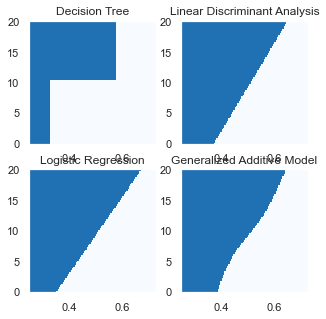

In [135]:
models = {
    'Decision Tree': loan_tree,
    'Linear Discriminant Analysis': loan_lda,
    'Logistic Regression': logit_reg,
    'Generalized Additive Model': gam,
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))

xvalues = np.arange(0.25, 0.73, 0.005)
yvalues = np.arange(-0.1, 20.1, 0.1)
xx, yy = np.meshgrid(xvalues, yvalues)
X = np.c_[xx.ravel(), yy.ravel()]

boundary = {}

for n, (title, model) in enumerate(models.items()):
    ax = axes[n // 2, n % 2]
    predict = model.predict(X)
    if 'Generalized' in title:
        Z = np.array([1 if z > 0.5 else 0 for z in predict])
    else:
        
        Z = np.array([1 if z == 'default' else 0 for z in predict])
    Z = Z.reshape(xx.shape)
    boundary[title] = yvalues[np.argmax(Z > 0, axis=0)]
    boundary[title][Z[-1,:] == 0] = yvalues[-1]

    c = ax.pcolormesh(xx, yy, Z, cmap='Blues', vmin=0.1, vmax=1.3, shading='auto')
    ax.set_title(title)
    ax.grid(True)



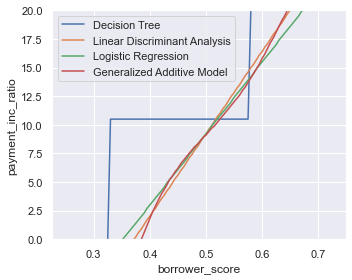

In [136]:
boundary['borrower_score'] = xvalues
boundaries = pd.DataFrame(boundary)

fig, ax = plt.subplots(figsize=(5, 4))
boundaries.plot(x='borrower_score', ax=ax)
ax.set_ylabel('payment_inc_ratio')
ax.set_ylim(0, 20)


plt.tight_layout()
plt.show()

#### $\S$ END OF CHAPTER 5 $\S$

### CHAPTER 6 - STATISTICAL MACHINE LEARNING



### K-Nearest Neighbors

The idea behind K-Nearest Neighbors (KNN) is very simple. For each record to be
classified or predicted:

1. Find K records that have similar features (i.e., similar predictor values).

2. For classification, find out what the majority class is among those similar records and assign that class to the new record.

3. For prediction (also called KNN regression), find the average among those similar records, and predict that average for the new record.

##### Key Terms for K-Nearest Neighbors

- Neighbor - A record that has similar predictor values to another record.

- Distance metrics - Measures that sum up in a single number how far one record is from another.

- Standardization -  Subtract the mean and divide by the standard deviation. Synonym - Normalization

- z-score - The value that results after standardization.

- K - The number of neighbors considered in the nearest neighbor calculation.

KNN is one of the simpler prediction/classification techniques: there is no model to
be fit (as in regression). This doesn’t mean that using KNN is an automatic procedure.
The prediction results depend on how the features are scaled, how similarity is
measured, and how big K is set. Also, all predictors must be in numeric form. We will
illustrate how to use the KNN method with a classification example.

In [1]:

import math
import os
import random
from collections import defaultdict
from itertools import product


import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from dmba import plotDecisionTree, textDecisionTree

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

%matplotlib inline

Consider a very simple model with just two predictor variables: `dti`, which is the ratio of debt payments (excluding mortgage) to income, and payment_`inc_ratio`, which is the ratio of the loan payment to income. Both ratios are multiplied by 100. Using a small set of 200 loans, `loan200`, with known binary outcomes (default or nodefault, specified in the predictor outcome200), and with $K$ set to 20, the KNN estimate for a new loan to be predicted, `newloan`, with `dti`=22.5 and
`payment_inc_ratio`=9 can be calculated as follows:

In [15]:
loan200 = pd.read_csv('data/data/loan200.csv')
loan200.shape

(201, 3)

In [16]:
loan200.head(5)

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81


In [17]:
predictors = ['payment_inc_ratio', 'dti']
outcome = 'outcome'


newloan = loan200.loc[0:0, predictors]
X = loan200.loc[1:, predictors]
y = loan200.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)
knn.predict(newloan)
print(knn.predict_proba(newloan))

[[0.45 0.55]]


Following plot gives a visual display of this example. The new loan to be predicted is the cross in the middle. The squares (paid off) and circles (default) are the training data.
The large black circle shows the boundary of the nearest 20 points. In this case, 9
defaulted loans lie within the circle, as compared with 11 paid-off loans. Hence the
predicted outcome of the loan is paid off. Note that if we consider only three nearest
neighbors, the prediction would be that the loan defaults.

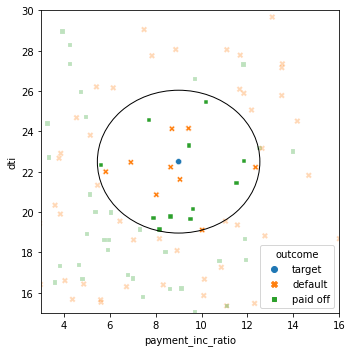

In [20]:
nbrs = knn.kneighbors(newloan)
maxDistance = np.max(nbrs[0][0])

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', 
                hue='outcome', data=loan200, alpha=0.3, ax=ax)
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', 
                hue='outcome', 
                data=pd.concat([loan200.loc[0:0, :], loan200.loc[nbrs[1][0] + 1,:]]), 
                ax=ax, legend=False)
ellipse = Ellipse(xy=newloan.values[0], 
                  width=2 * maxDistance, height=2 * maxDistance,
                  edgecolor='black', fc='None', lw=1)
ax.add_patch(ellipse)
ax.set_xlim(3, 16)
ax.set_ylim(15, 30)

plt.tight_layout()
plt.show()

$Note$

While the output of KNN for classification is typically a binary
decision, such as default or paid off in the loan data, KNN routines
usually offer the opportunity to output a probability (propensity)
between 0 and 1. The probability is based on the fraction of one
class in the K nearest neighbors. In the preceding example, this
probability of default would have been estimated at 9
20 , or 0.45.
Using a probability score lets you use classification rules other than
simple majority votes (probability of 0.5). This is especially important
in problems with imbalanced classes; see “Strategies for Imbalanced
Data” section. For example, if the goal is to identify
members of a rare class, the cutoff would typically be set below
50%. One common approach is to set the cutoff at the probability
of the rare event.

#### Distance Metrics

Similarity (nearness) is determined using a distance metric, which is a function that
measures how far two records $(x_1, x_2,\dots, x_p)$ and $(u_1, u_2,\ldots, u_p)$ are from one another.
The most popular distance metric between two vectors is *Euclidean distance*. To measure the Euclidean distance between two vectors, subtract one from the other,
square the differences, sum them, and take the square root:

$$\sqrt{(x_1-u_1)^2+(x_2-u_2)^2+\ldots+(x_p-u_p)^2}$$

Another common distance metric for numeric data is Manhattan distance:

$$|x_1-u_1|+|x_2-u_2|+\ldots+|x_p-u_p|$$

Euclidean distance corresponds to the straight-line distance between two points (e.g.,
as the crow flies). Manhattan distance is the distance between two points traversed in
a single direction at a time (e.g., traveling along rectangular city blocks). For this reason,
Manhattan distance is a useful approximation if similarity is defined as point-topoint
travel time.

In measuring distance between two vectors, variables (features) that are measured
with comparatively large scale will dominate the measure. For example, for the loan
data, the distance would be almost solely a function of the income and loan amount
variables, which are measured in tens or hundreds of thousands. Ratio variables
would count for practically nothing in comparison. We address this problem by
standardizing the data; see “Standardization (Normalization, z-Scores)” later.

#### One Hot Encoder

|Outcome|Loan amt|Income|Purpose|Yrs employed|Home ownership|State|
|----|----|----|----|---|--|--|
|Paid off|10000|79100|debt-consolidation|11|Mortgage|NV|
|Default|15250|232000|small_business|9|Mortgage|CA|

The loan data in table above includes several factor (string) variables. Most statistical and machine learning models require this type of variable to be converted to a series
of binary dummy variables conveying the same information, as in Table below. Instead
of a single variable denoting the home occupant status as “owns with a mortgage,”

|Owns with mortgage|Owns w/out mortgage|Other|Rent|
|---|---|---|---|
|1|0|0|0|
|0|0|0|1|


$Note$

In linear and logistic regression, one hot encoding causes problems
with multicollinearity; see “Multicollinearity” section. In such
cases, one dummy is omitted (its value can be inferred from the
other values). This is not an issue with KNN and other methods
discussed in this book.

#### Standardization (Normalization, z-Scores)

In measurement, we are often not so much interested in “how much” but in “how different from the average.” Standardization, also called normalization, puts all variables on similar scales by subtracting the mean and dividing by the standard deviation; in this way, we ensure that a variable does not overly influence a model simply due to the scale of its original measurement:

$$z = \frac{x − \bar{x}}{s}$$
The result of this transformation is commonly referred to as a z-score. Measurements
are then stated in terms of “standard deviations away from the mean.”

For KNN and a few other procedures (e.g., principal components analysis and clustering),
it is essential to consider standardizing the data prior to applying the procedure.
To illustrate this idea, KNN is applied to the loan data using `dti` and
payment_`inc_ratio` plus two other variables: `revol_bal`, the total revolving credit available to the applicant
in dollars, and `revol_util`, the percent of the credit being used. The new record
to be predicted is shown here:

In [33]:
loan_data = pd.read_csv('data/data/loan_data.csv.gz')
loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'], 
                                      categories=['paid off', 'default'], 
                                      ordered=True)


predictors = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'

newloan = loan_data.loc[0:0, predictors]
print(newloan)
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

nbrs = knn.kneighbors(newloan)
print(X.iloc[nbrs[1][0], :])

   payment_inc_ratio  dti  revol_bal  revol_util
0             2.3932  1.0       1687         9.4
       payment_inc_ratio   dti  revol_bal  revol_util
35536            1.47212  1.46       1686        10.0
33651            3.38178  6.37       1688         8.4
25863            2.36303  1.39       1691         3.5
42953            1.28160  7.14       1684         3.9
43599            4.12244  8.98       1684         7.2


In [36]:
newloan

,payment_inc_ratio,dti,revol_bal,revol_util
0,2.3932,1.0,1687,9.4


In [37]:
nbrs

(array([[1.55563118, 5.64040694, 7.13883816, 8.84224262, 8.97277387]]),
 array([[35535, 33650, 25862, 42952, 43598]], dtype=int64))

The value of `revol_bal` in these neighbors is very close to its value in the new record,
but the other predictor variables are all over the map and essentially play no role in
determining neighbors.

Compare this to KNN applied to the standardized data. The `sklearn.preprocessing.StandardScaler` method is first trained with the predictors and is subsequently used to transform the data set prior to training the KNN model:


In [38]:
newloan = loan_data.loc[0:0, predictors]
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

scaler = preprocessing.StandardScaler()
scaler.fit(X * 1.0)

X_std = scaler.transform(X * 1.0)
newloan_std = scaler.transform(newloan * 1.0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_std, y)

nbrs = knn.kneighbors(newloan_std)
print(X.iloc[nbrs[1][0], :])

       payment_inc_ratio   dti  revol_bal  revol_util
2080             2.61091  1.03       1218         9.7
1438             2.34343  0.51        278         9.9
30215            2.71200  1.34       1075         8.5
28542            2.39760  0.74       2917         7.4
44737            2.34309  1.37        488         7.2


The five nearest neighbors are much more alike in all the variables, providing a more
sensible result. Note that the results are displayed on the original scale, but KNN was
applied to the scaled data and the new loan to be predicted.

#### Choosing K

Generally speaking, if K is too low, we may be overfitting: including the noise in the
data. Higher values of K provide smoothing that reduces the risk of overfitting in the
training data. On the other hand, if K is too high, we may oversmooth the data and
miss out on KNN’s ability to capture the local structure in the data, one of its main
advantages.

The K that best balances between overfitting and oversmoothing is typically determined
by accuracy metrics and, in particular, accuracy with holdout or validation
data. There is no general rule about the best K—it depends greatly on the nature of
the data. For highly structured data with little noise, smaller values of K work best.
Borrowing a term from the signal processing community, this type of data is sometimes
referqred to as having a high *signal-to-noise ratio *(SNR). Examples of data with a
typically high SNR are data sets for handwriting and speech recognition. For noisy
data with less structure (data with a low SNR), such as the loan data, larger values of
K are appropriate. Typically, values of K fall in the range 1 to 20. Often, an odd number is chosen to avoid ties.

####  KNN as a Feature Engine

KNN gained its popularity due to its simplicity and intuitive nature. In terms of performance, KNN by itself is usually not competitive with more sophisticated classification techniques. In practical model fitting, however, KNN can be used to add “local\ knowledge” in a staged process with other classification techniques:

1. KNN is run on the data, and for each record, a classification (or quasi-probability of a class) is derived.

2. That result is added as a new feature to the record, and another classification

method is then run on the data. The original predictor variables are thus used twice.

At first you might wonder whether this process, since it uses some predictors twice,
causes a problem with multicollinearity (see “Multicollinearity” section). This is
not an issue, since the information being incorporated into the second-stage model is
highly local, derived only from a few nearby records, and is therefore additional
information and not redundant.

For example, consider the King County housing data. In pricing a home for sale, a
realtor will base the price on similar homes recently sold, known as “comps.” In
essence, realtors are doing a manual version of KNN: by looking at the sale prices of
similar homes, they can estimate what a home will sell for. We can create a new feature
for a statistical model to mimic the real estate professional by applying KNN to
recent sales. The predicted value is the sales price, and the existing predictor variables
could include location, total square feet, type of structure, lot size, and number of
bedrooms and bathrooms. The new predictor variable (feature) that we add via KNN
is the KNN predictor for each record (analogous to the realtors’ comps). Since we are
predicting a numerical value, the average of the K-Nearest Neighbors is used instead
of a majority vote (known as KNN regression).

Similarly, for the loan data, we can create features that represent different aspects of
the loan process. For example, the following code would build a feature that represents
a borrower’s creditworthiness.

With scikit-learn, we use the `predict_proba` method of the trained model to get
the probabilities:

count    45342.000000
mean         0.501091
std          0.128728
min          0.000000
25%          0.400000
50%          0.500000
75%          0.600000
max          0.950000
Name: borrower_score, dtype: float64


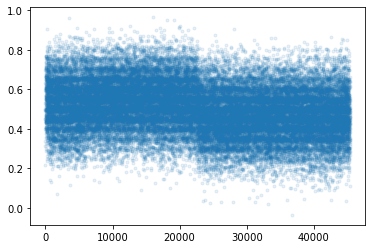

In [39]:
loan_data = pd.read_csv('data/data/loan_data.csv.gz')
loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'], 
                                      categories=['paid off', 'default'], 
                                      ordered=True)

predictors = ['dti', 'revol_bal', 'revol_util', 'open_acc', 
              'delinq_2yrs_zero', 'pub_rec_zero']
outcome = 'outcome'

X = loan_data[predictors]
y = loan_data[outcome]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)
plt.scatter(range(len(X)), [bs + random.gauss(0, 0.015) for bs in knn.predict_proba(X)[:,0]], 
            alpha=0.1, marker='.')
knn.predict_proba(X)[:, 0]

loan_data['borrower_score'] = knn.predict_proba(X)[:, 0]
print(loan_data['borrower_score'].describe())

The result is a feature that predicts the likelihood a borrower will default based on his
credit history.

### Tree Models

Tree models, also called Classification and Regression Trees (CART), decision trees, or
just trees, are an effective and popular classification (and regression) method initially
developed by Leo Breiman and others in 1984. Tree models, and their more powerful
descendants random forests and boosted trees (see “Bagging and the Random Forest”  and “Boosting” later), form the basis for the most widely
used and powerful predictive modeling tools in data science for regression and
classification.

##### Key Terms for Trees

- Recursive partitioning -  Repeatedly dividing and subdividing the data with the goal of making the outcomes in each final subdivision as homogeneous as possible.

- Split value -  A predictor value that divides the records into those where that predictor is less than the split value, and those where it is more.

- Node - In the decision tree, or in the set of corresponding branching rules, a node is the graphical or rule representation of a split value.

- Leaf - The end of a set of if-then rules, or branches of a tree—the rules that bring you to that leaf provide one of the classification rules for any record in a tree.

- Loss -  The number of misclassifications at a stage in the splitting process; the more losses, the more impurity.

- Impurity - The extent to which a mix of classes is found in a subpartition of the data (the more mixed, the more impure). Synonym -  Heterogeneity. Antonyms - Homogeneity, purity

- Pruning -  The process of taking a fully grown tree and progressively cutting its branches back to reduce overfitting.

#### A Simple Example

The package _scikit-learn_ has the class `DecisionTreeClassifier` to build a decision tree model. The function `plotDecisionTree` from the _dmba_ package can be used to visualize the tree. 

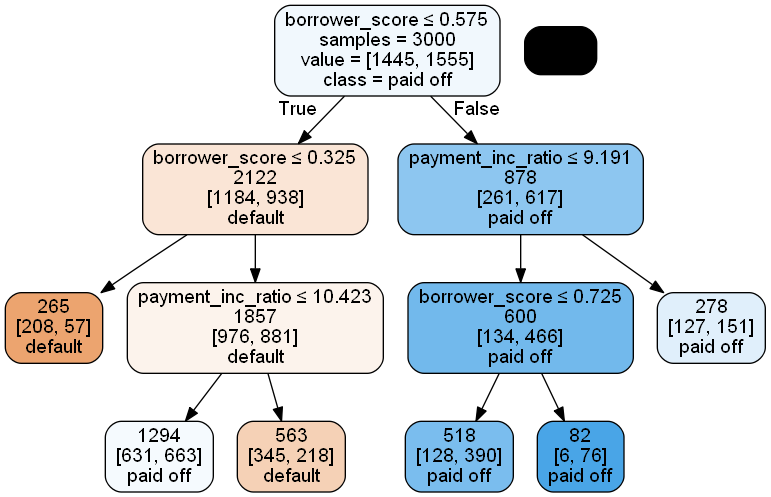

In [2]:

from dmba import plotDecisionTree, textDecisionTree

loan3000 = pd.read_csv('data/data/loan3000.csv')

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

loan_tree = DecisionTreeClassifier(random_state=1, criterion='entropy',
                                   min_impurity_decrease=0.003)

loan_tree.fit(X, y)
plotDecisionTree(loan_tree, feature_names=predictors, class_names=loan_tree.classes_)